<a href="https://colab.research.google.com/github/tejaspatni/Cardiovascular-Risk-Prediction-ML-model/blob/main/Cardiovascular_Risk_Prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.High blood pressure, high blood cholesterol, and smoking are key risk factors for heart disease.There were more than 523.2 million cases of cardiovascular disease in 2019, an increase of 26.6% compared with 2010.

# **GitHub Link -**

https://github.com/tejaspatni/Cardiovascular-Risk-Prediction-ML-model

# **Problem Statement**


The data is from an ongoing cardiovascular study on residents of the town of framingham, Massachusetts. The classification goal is to predict whether the patient has a risk of 10 year coronary heart disease(CHD). The dataset provides the patient's information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavoural, and medical risk factor.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Capstone Classification - Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
raw_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
raw_data.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(raw_data[raw_data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
raw_data.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

<Axes: >

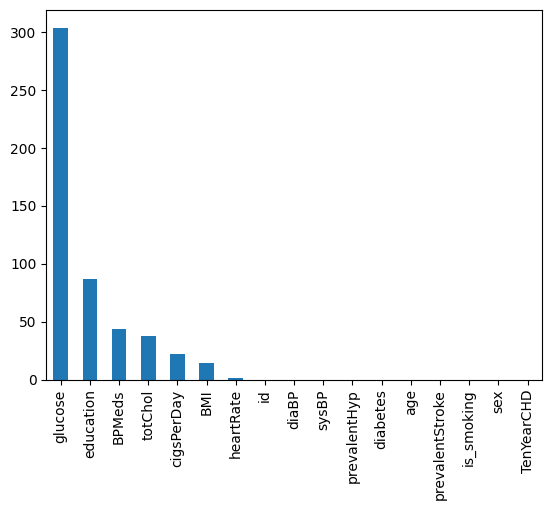

In [ ]:
# Visualizing the missing value
raw_data.isnull().sum().sort_values(ascending=False).plot(kind ='bar')

### What did you know about your dataset?

The Following Information we know from the dataset:

1. The Dataset consists of 3390 rows and 17 columns
2. The datatype consists of  int, float, and object values
3. There is no duplicate values but there are certain missing values in some variables with 'glucose' having the maximum missing values in dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
raw_data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
raw_data.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description 

**Demographic:**

1. Sex: male or female ("M" or "F")
2. Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**

1. is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
2. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**

1. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
2. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
3. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
4. Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**

1. Tot Chol: total cholesterol level (Continuous)
2. Sys BP: systolic blood pressure (Continuous)
3. Dia BP: diastolic blood pressure (Continuous)
4. BMI: Body Mass Index (Continuous)
5. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
6. Glucose: glucose level (Continuous)

**Predict variable (desired target):**

1. 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
raw_data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df = raw_data.copy()

Handling missing values

In [ ]:
# Changing the Categorical Variables and mapping them to 0 and 1
# Changing the sex column by Mapping the male as 0 and female as 1
df['sex'] = df['sex'].map({'M':0, 'F':1})

# Changing the is_smoking column by Mapping the YES as 1 and NO as 0
df['is_smoking']= df['is_smoking'].map({'YES':1,'NO':0})

In [ ]:
df[df['cigsPerDay'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,1,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,0,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,0,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,1,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,1,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,1,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,1,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,NaN,1,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,1,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [ ]:
# Imputing the missing values in the cigs_per_day 
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']==1]['cigsPerDay'].median())

In [ ]:
# Imputing the missing values
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [ ]:
# Instead of removing the rows of missing value from eduction, we can remove the whole education and id column as it will not effect in having any cardio risk or not
df = df.drop(['education','id'],axis =1)

There are 304 missing values in the glucose column. If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.
To avoid this we can impute the missing values using KNN imputer.

In [ ]:
# Imputing the missing values of glucose by knn
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors = 5)

df = pd.DataFrame(knn_imputer.fit_transform(df),
                         columns=df.columns,
                         index=df.index)

In [ ]:
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df['TenYearCHD'].value_counts()

0.0    2879
1.0     511
Name: TenYearCHD, dtype: int64

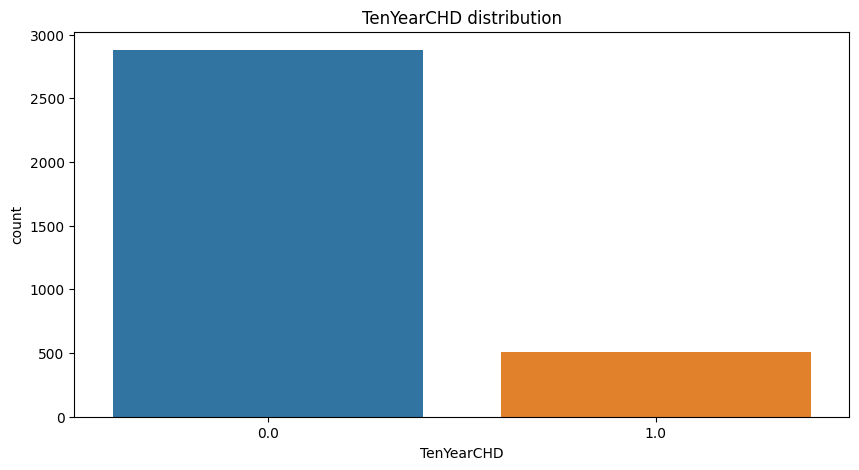

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='TenYearCHD')
plt.xlabel('TenYearCHD')
plt.title('TenYearCHD distribution')
plt.show()

In [ ]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,25.38,90.0,80.0,1.0
1,36.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,46.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,50.0,0.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,64.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


In [ ]:
df.describe(include='all')

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,0.567257,0.497640,9.140413,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.999056,0.150737
std,8.592878,0.495529,0.500068,11.872952,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.307653,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,86.000000,0.000000
max,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### What all manipulations have you done and insights you found?

Manipulation done and insights found from the dataset:
1. Treated all the missing values by imputing median instead of bp meds and glucose.
2. Treated the missing values of glucose by knn method it has large number of missing values and imputing median will increase the bias and Bp meds to its mode value.
3.  Observed the descriptive analysis of all the variables and found out that it's mean and median values are similar, we might say that it doesn't contain any outliers and it is normally distributed.
4. Change the Categorical Variable and mapped them as 1 and 0
5. The target variable of the data is imbalanced, we need to  perform some operations to make it balanced.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

In [ ]:
# Creating Numerical Variable
num_var = df.drop(columns = ['sex', 'is_smoking','BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD'])
num_var.columns
print(len(num_var.columns))

8


In [ ]:
# Creating  categorical or discrete Variables
cat_var = df.drop(columns = ['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose'])
cat_var.columns
print(len(cat_var.columns))

7


#### Chart - 1 - Box Plot (Univariate - Numerical)

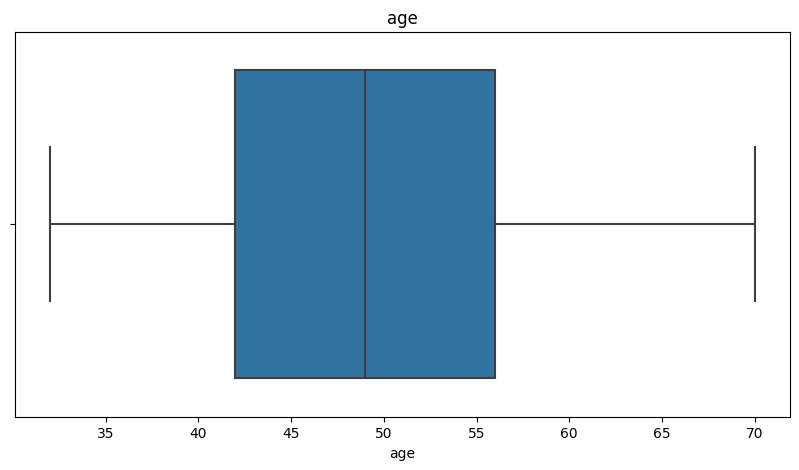

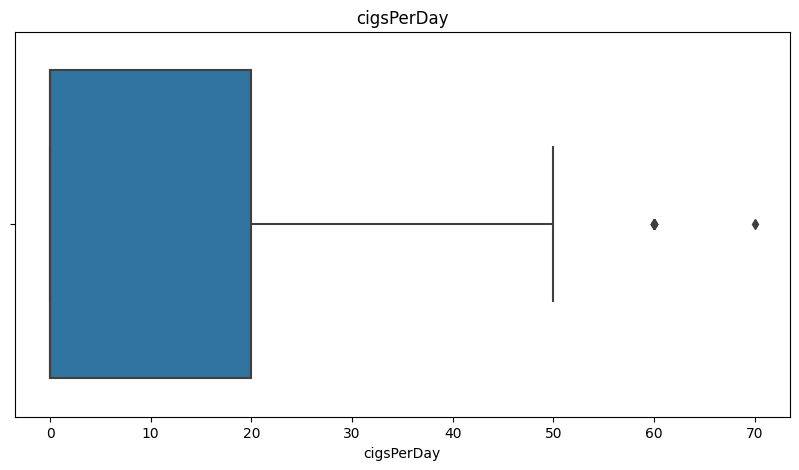

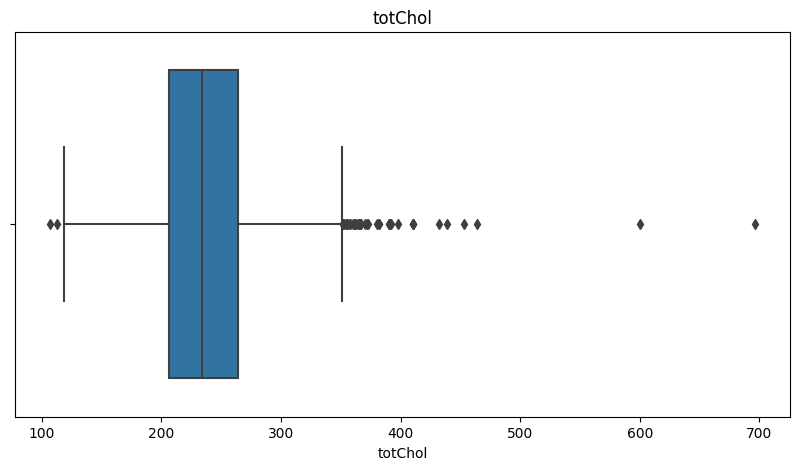

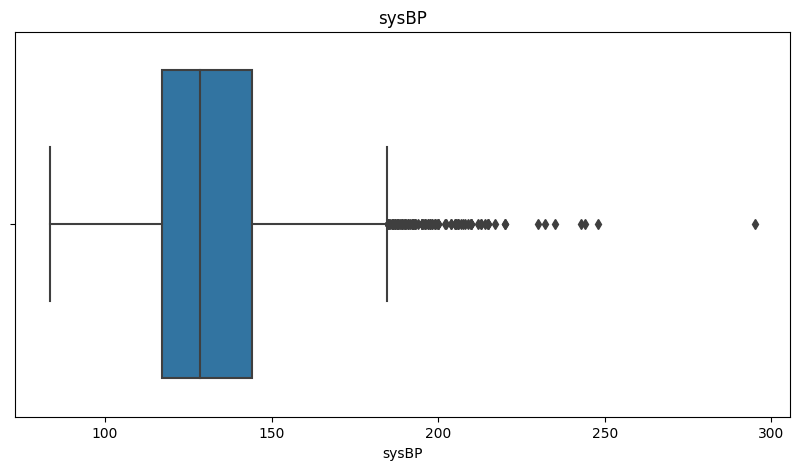

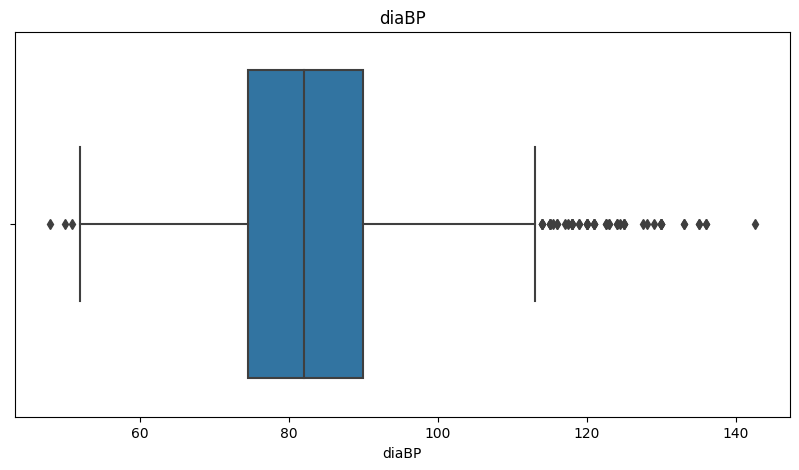

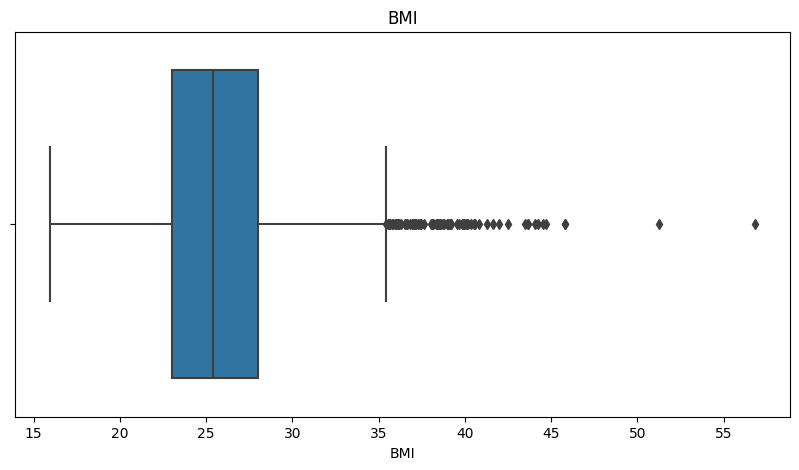

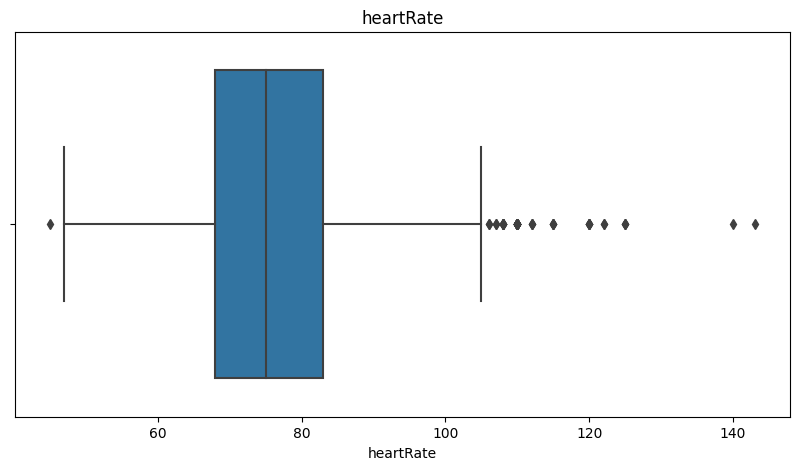

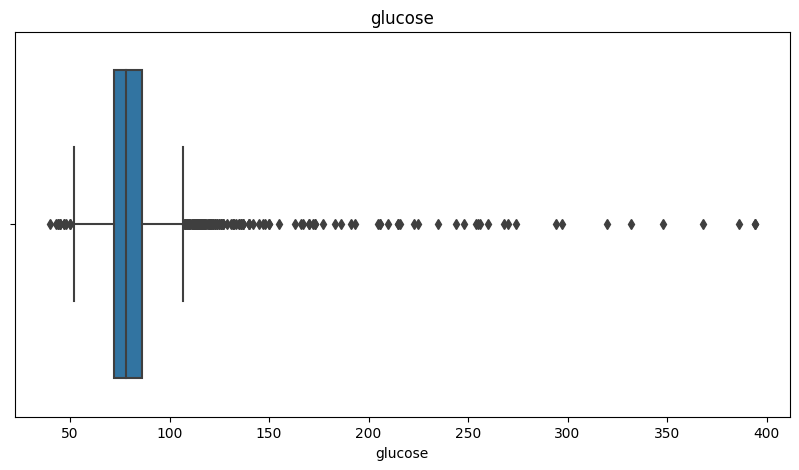

In [ ]:
# Chart - 1 visualization code
for col in num_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=col,data=df) 
  plt.title(col)
  plt.show()

##### 1. Why did you pick the specific chart?

Box plots are a great choice for visualizing the distribution of data, especially when you want to compare the distributions of two or more groups. They are useful for showing the range, median, and quartiles of a dataset, and can help you identify outliers and compare the spread of data between groups.

##### 2. What is/are the insight(s) found from the chart?

The box plot helps in determining the outliers and we can see there are many outliers in the data which is not good for distribution

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will Helps businesses to know the extreme points in data. It Depends on the what variable will effect the data or business on what extent.

#### Chart - 2 - Histogram and Distribution (Univariate - Niumerical)

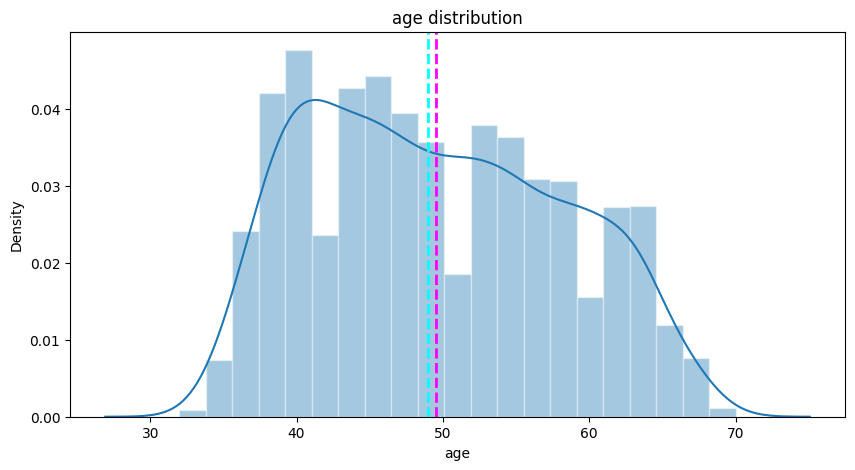

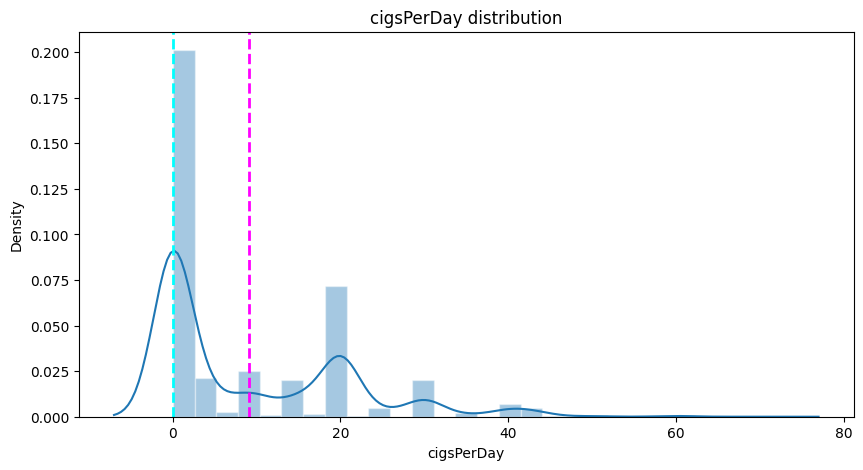

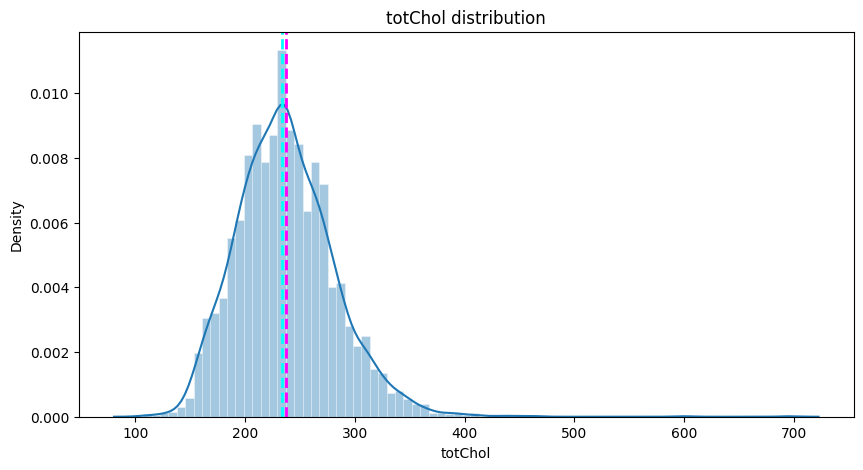

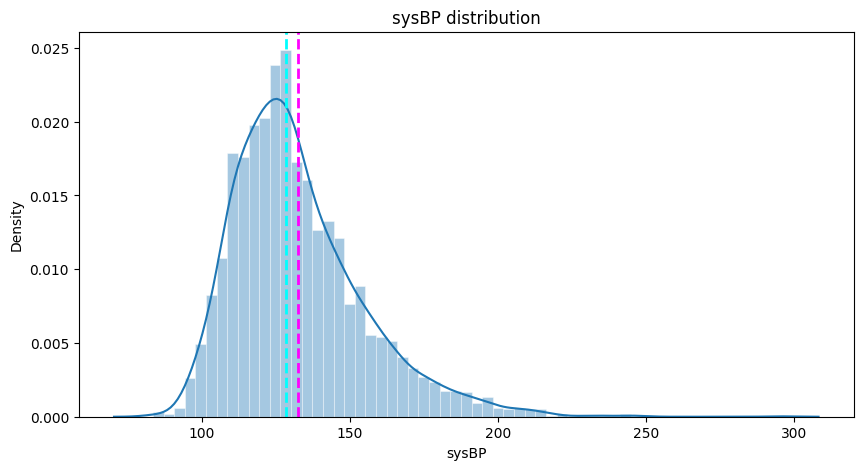

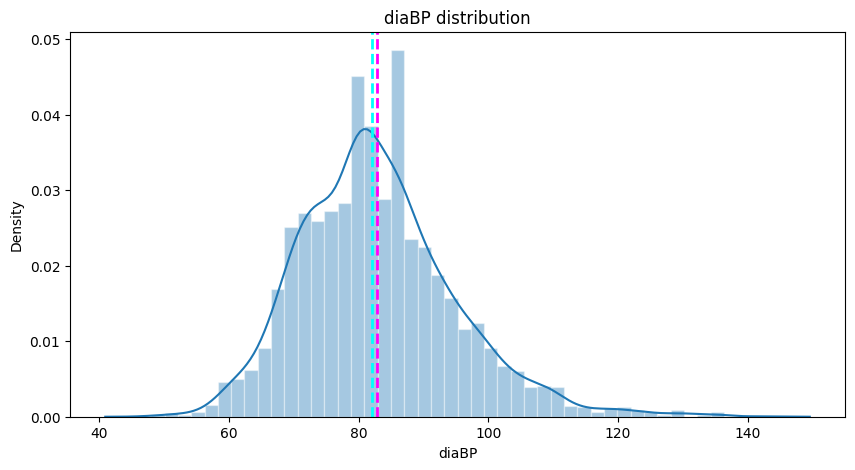

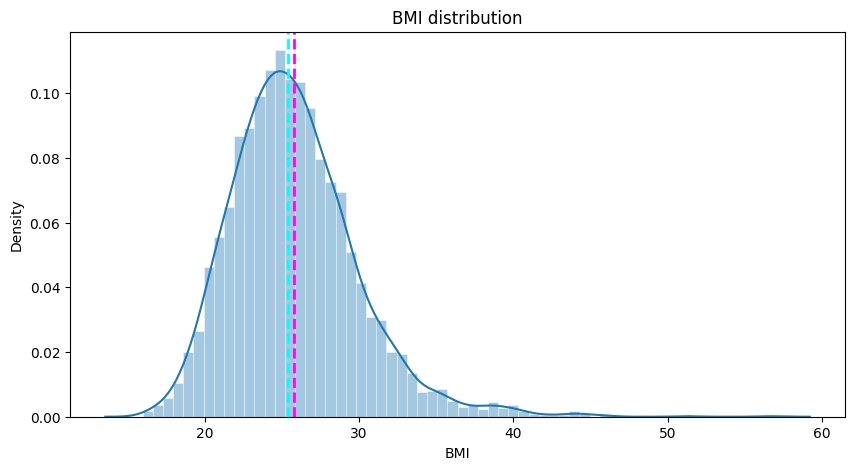

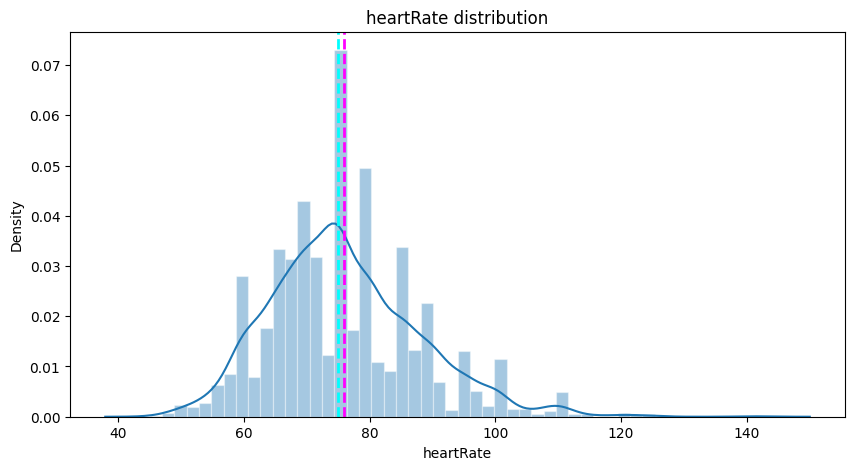

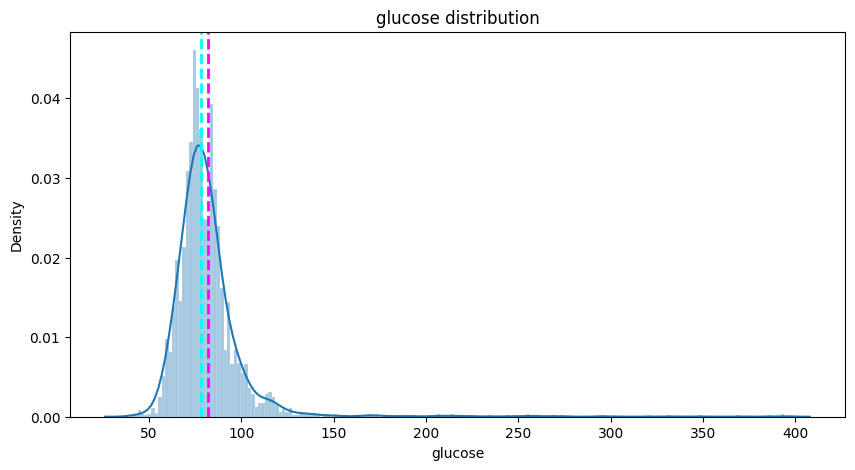

In [ ]:
# Chart - 2 visualization code
for col in num_var:
  plt.figure(figsize=(10,5))
  sns.histplot(
    num_var[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    )
  plt.axvline(num_var[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(num_var[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Distribution charts, also known as density plots or histograms, are a great choice for visualizing the distribution of data. They show how the data is spread out over a range of values, and can help you identify the shape of the distribution, the presence of outliers, and the location of the center of the data.

##### 2. What is/are the insight(s) found from the chart?

Most of the data of variables are normally distributed but few of them are right skewed. We have to apply a log transformation to make the distribution as normal.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will  help to create positive business impact as it will detect the outlier and tell us the standard deviation through which we know our data range and at what actions we need to take on those levels

#### Chart - 3 - Countplot (Univariate - Categorical)

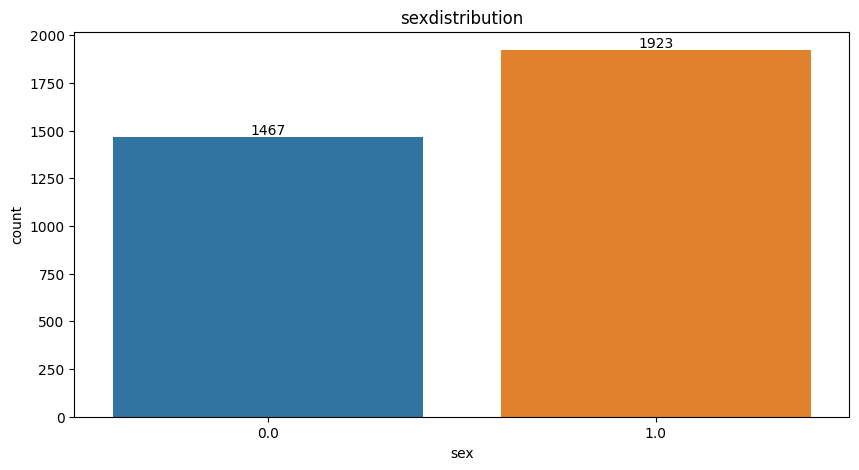

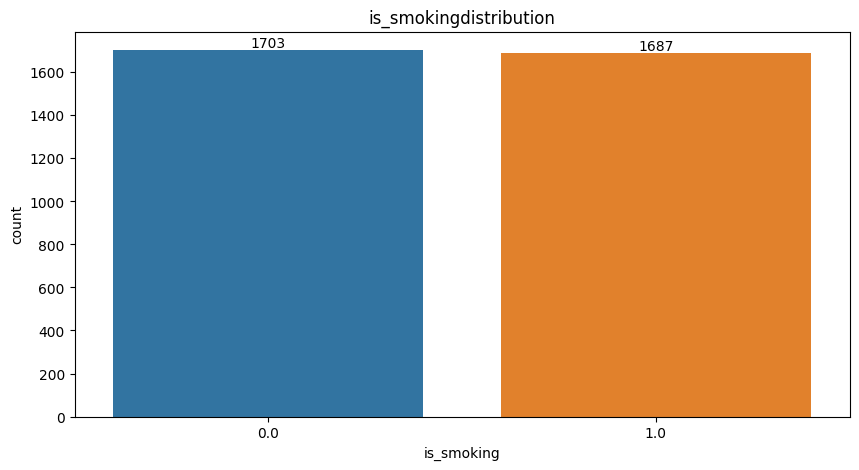

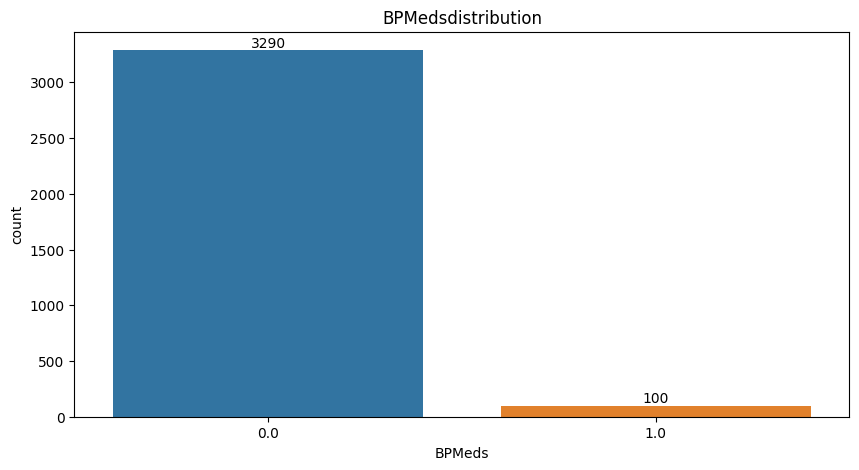

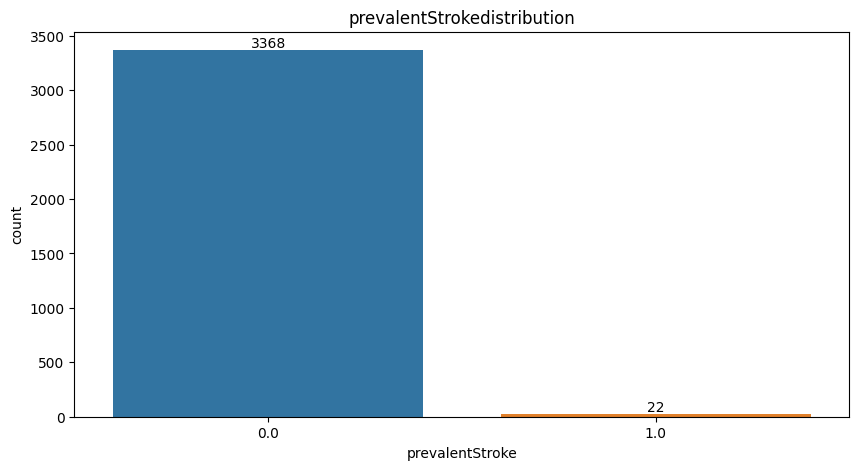

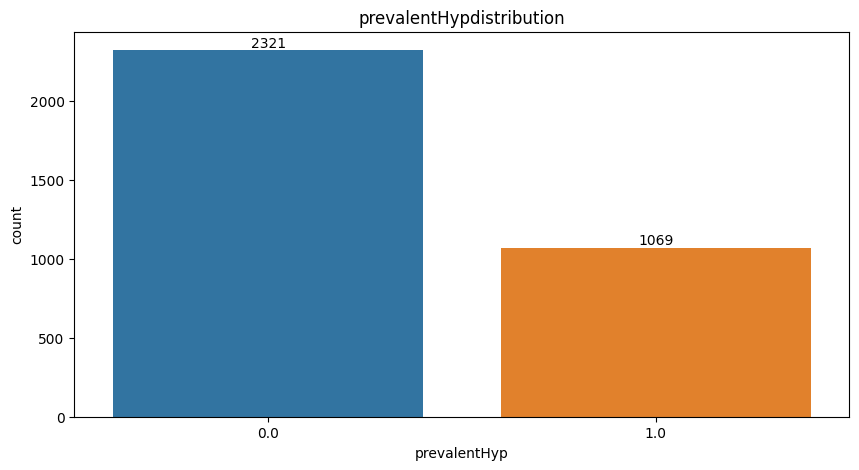

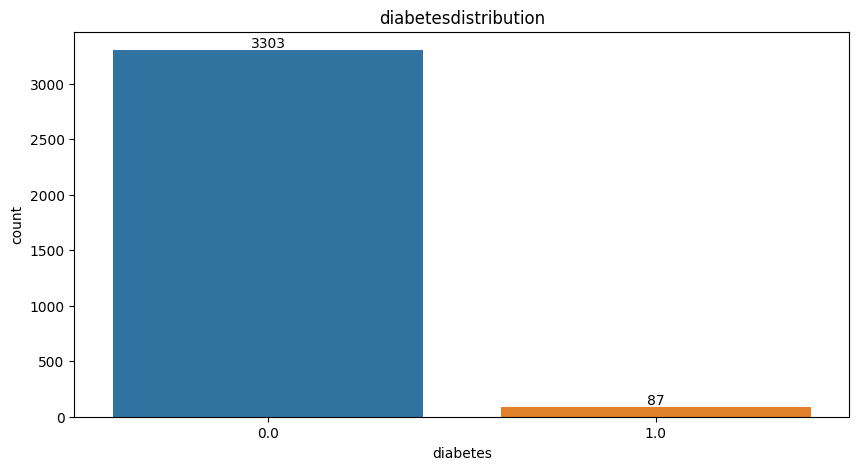

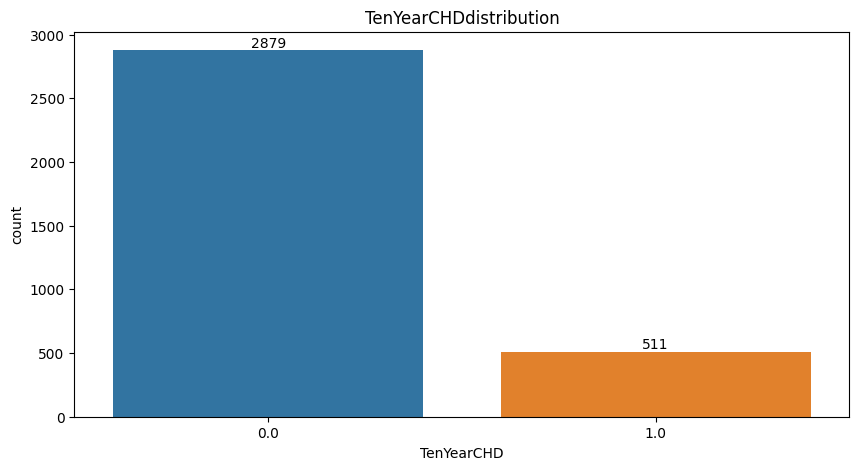

In [ ]:
# Chart - 3 visualization code
for col in cat_var:
  plt.figure(figsize=(10,5))
  ax = sns.countplot(data=cat_var, x=col)
  plt.xlabel(col)
  plt.title(col+'distribution')
  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),ha='center', va='bottom')
  plt.show()

##### 1. Why did you pick the specific chart?

countplots are a useful tool for quickly visualizing the distribution of categorical variables and identifying patterns and trends in data.

##### 2. What is/are the insight(s) found from the chart?

The Insights found are :
1. We mapped 0 as female and 1 as male. There are more female patients compared to male patients.
2. Almost half the patients are smokers.
3. 100 patients under the study are undertaking blood pressure medication.
4. 22 patients under the study have experienced a stroke.
5. 1069 patients have hypertension.
6. 87 patients have diabetes.
7. The classification Dataset is imbalanced.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will create a positive business impact as it will gives the details about the categorical and discrete variables and help us to know the actions to be taken

#### Chart - 4 - BoxPlot(Bivariate) - Dependent vs Numerical

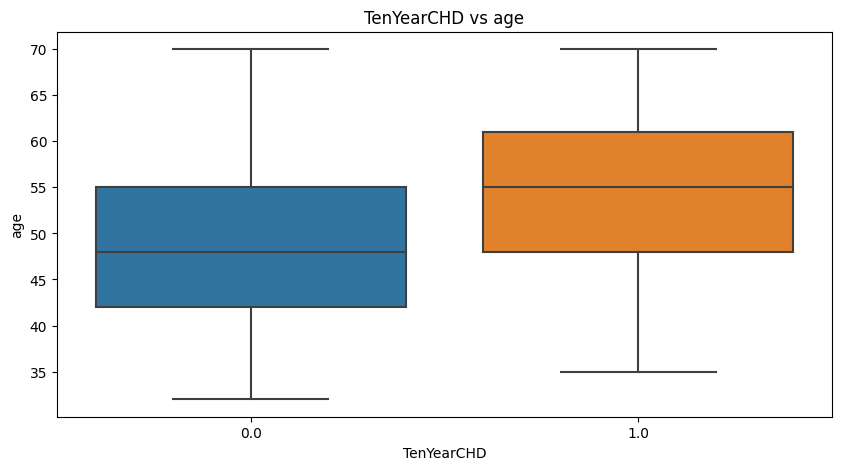

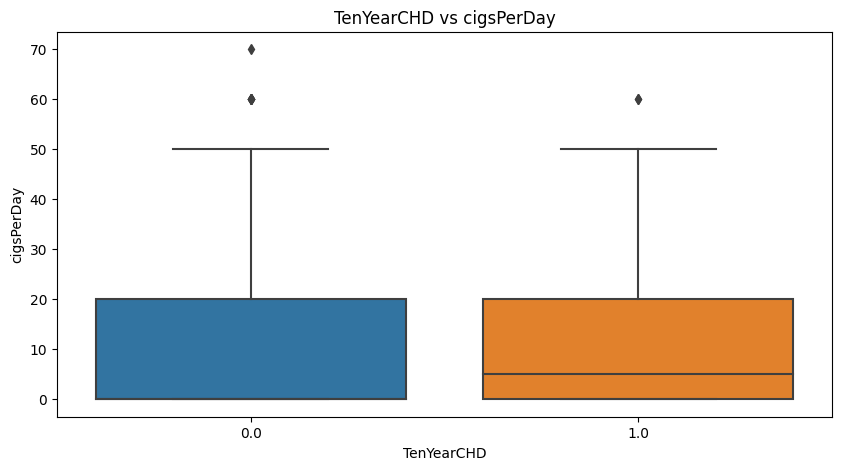

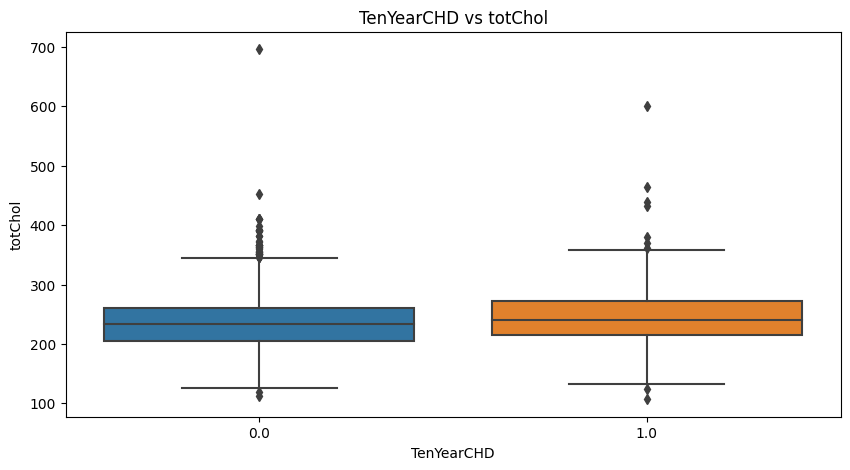

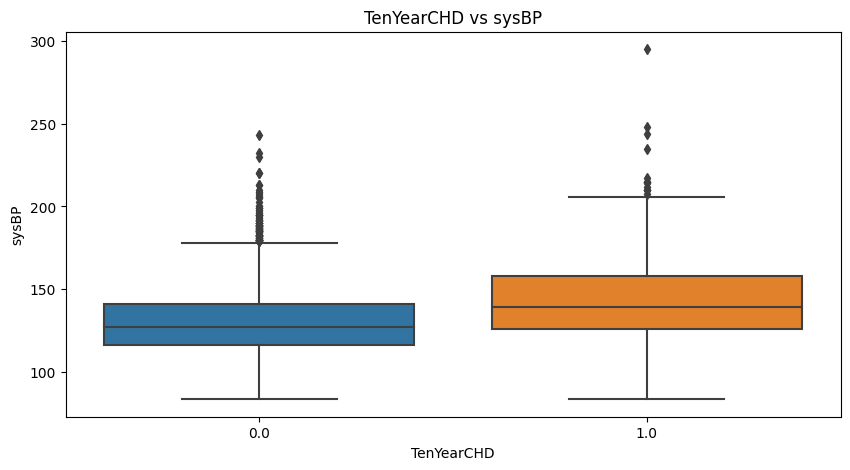

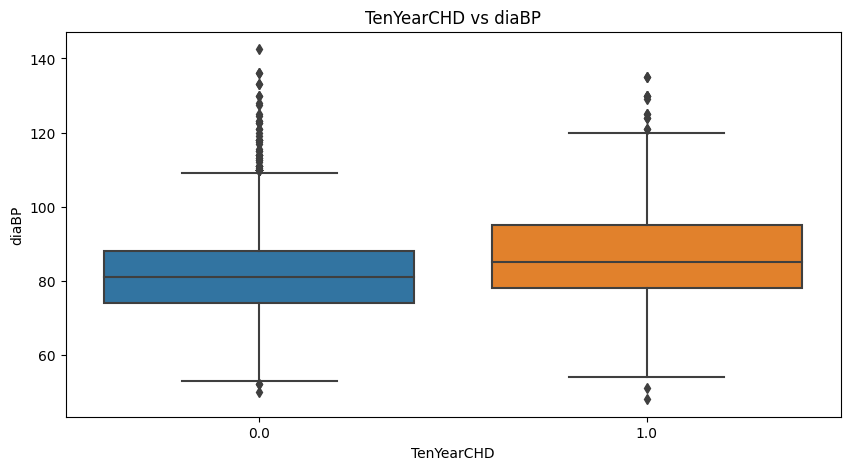

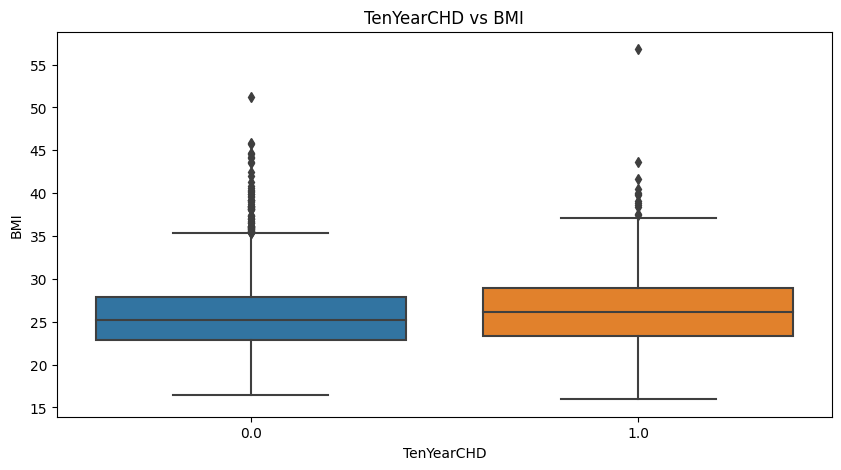

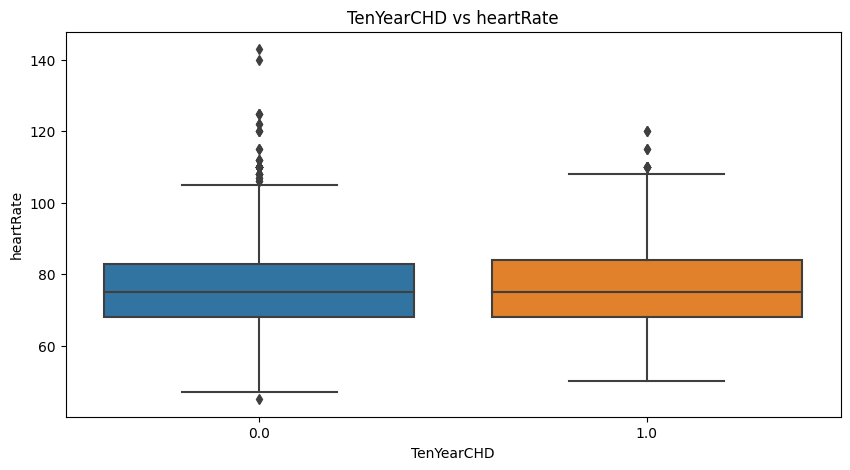

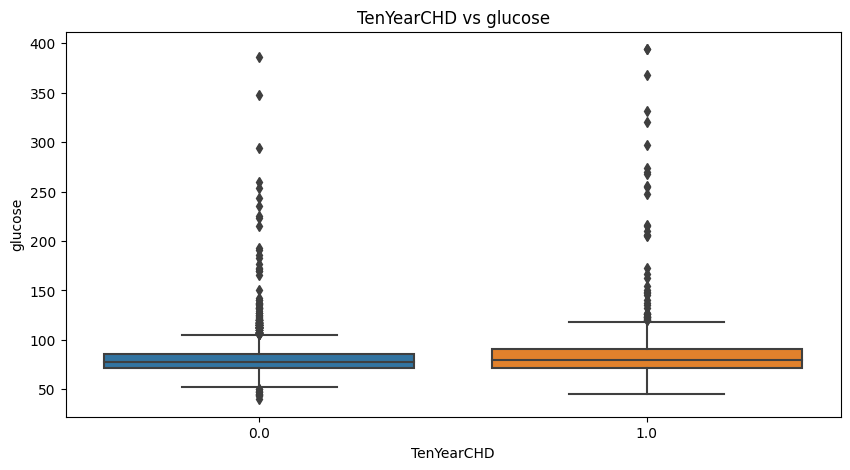

In [ ]:
# Chart - 4 visualization code
for col in num_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=cat_var['TenYearCHD'],y=col,data=df) 
  plt.ylabel(col)
  plt.xlabel('TenYearCHD')
  plt.title('TenYearCHD'+' vs '+col)
  plt.show()

##### 1. Why did you pick the specific chart?

Box plots are a great choice for visualizing the distribution of data, especially when you want to compare the distributions of two or more groups. They are useful for showing the range, median, and quartiles of a dataset, and can help you identify outliers and compare the spread of data between groups.

##### 2. What is/are the insight(s) found from the chart?

This Helps in Creating insights in categorical vs numerical variable on discrete values. This will helps us to know how much outlier present in each target variable for different numerical feature.
1. The risk of CHD is higher for older patients than younger patients.
2. No conclusive evidence on the risk of CHD with other continuous variables

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will create a posistive impact as it helps us to understand which variable has better imact on the patient having or not having at risk of cardiovascular 

#### Chart - 5 -Stacked Bar (Bivariavte) - Dependent Vs Categorical

<Figure size 1000x500 with 0 Axes>

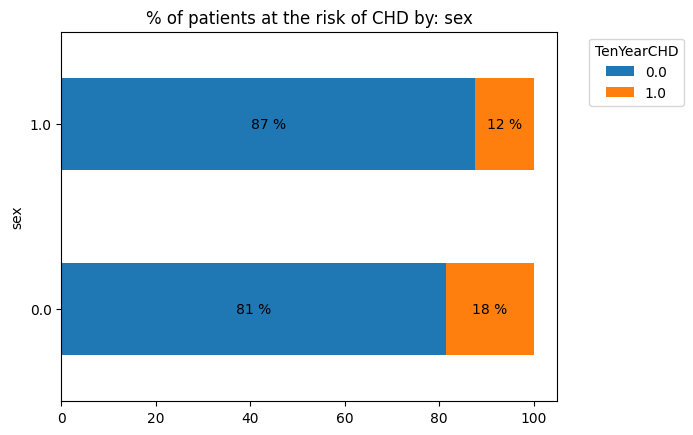

<Figure size 1000x500 with 0 Axes>

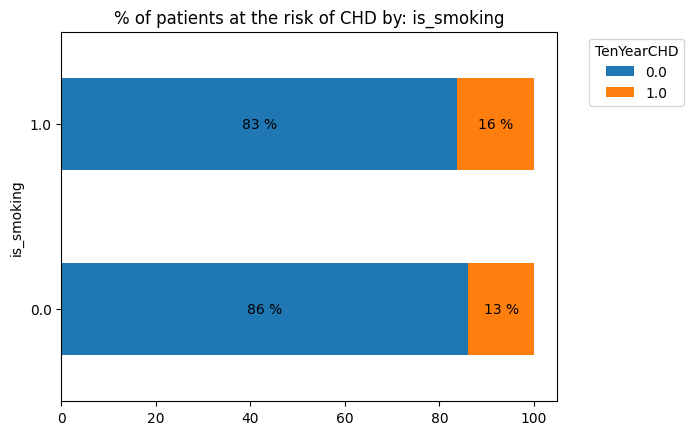

<Figure size 1000x500 with 0 Axes>

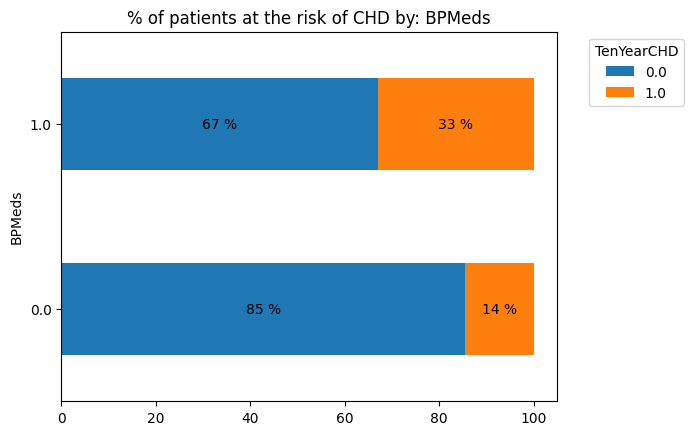

<Figure size 1000x500 with 0 Axes>

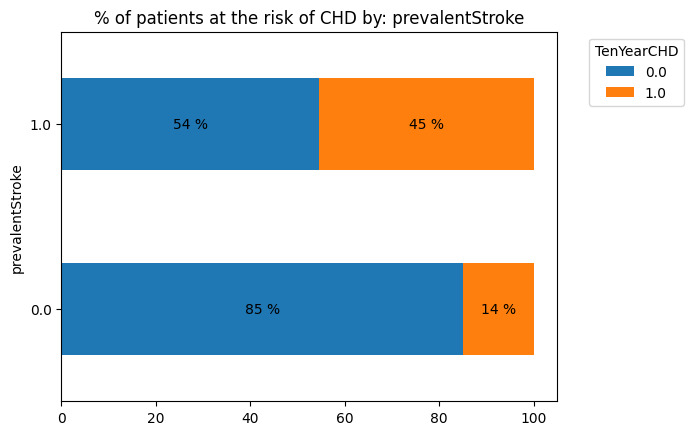

<Figure size 1000x500 with 0 Axes>

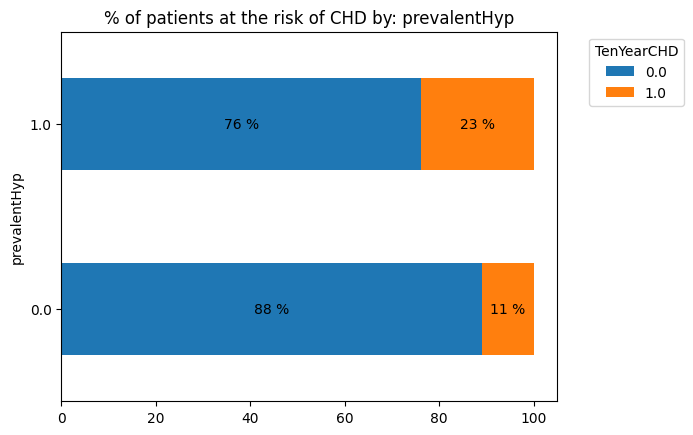

<Figure size 1000x500 with 0 Axes>

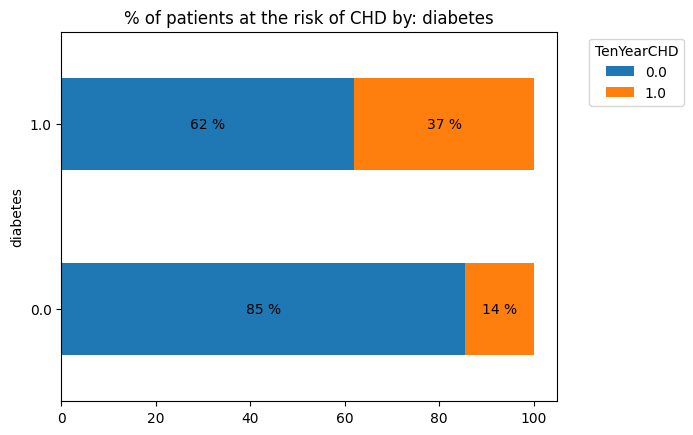

In [ ]:
for i in cat_var:
    if i== 'TenYearCHD':
      continue
    x_var, y_var = i, 'TenYearCHD'
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

##### 1. Why did you pick the specific chart?

In a stacked bar chart, the bars are divided into segments, with each segment representing a different category within the data. The segments are stacked on top of each other to create a single bar. Stacked bar charts are a useful tool for visualizing the distribution of categorical data, especially when you want to compare multiple variables or track changes over time.

##### 2. What is/are the insight(s) found from the chart?

The Insights Found are:
1. Male patients have significantly higher risk of CHD (18%) than female patients (12%)
2. Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)
3. Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)
4. Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)
5. Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)
6. Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this is Very helpful in creating insights according to the percentages that each condition effect on Cardiovascular risk.

#### Chart - 6 - Stacked Bar (Bivariavte) - Dependent Vs Numerical

In [ ]:
dataset = df.copy()

Changing the continuous variables to categorical variables according to their ranges to how they are classified.

In [ ]:
# making cholestrol range according to normal , borderline and high.
def cholestrol(row):
    if row['totChol'] < 200:
        value = 'Normal'
    elif row['totChol'] < 240:
        value = 'Borderline'
    else:
        value = "High"
    
    return value

In [ ]:
dataset['Cholestrol_level'] = dataset.apply(cholestrol, axis = 1)

In [ ]:
# making BP range according to normal , Prehypertension and hypertension.
def BP(row):
    if row['sysBP'] < 120 or row['diaBP'] < 80:
        value = 'Normal'
    elif row['sysBP'] < 140 or row['diaBP'] < 90:
        value = 'Prehypertension'
    else:
        value = 'hypertension'
    
    return value

In [ ]:
dataset['BP_level'] = dataset.apply(BP, axis = 1)

In [ ]:
# making Bmi range according Underweight ,Healthy, Overweight and obese.
def BMI_level(row):
    if row['BMI'] < 18.5:
        value = 'Underweight'
    elif row['BMI'] < 25:
        value = 'Healthy'
    elif row['BMI'] < 30:
        value = 'Overweight'
    else:
        value = "Obese"
    
    return value

In [ ]:
dataset['BMI_levels'] = dataset.apply(BMI_level, axis = 1)

In [ ]:
# making heart rate range according Low ,Normal ,and High.
def heartRate_data(row):
    if row['heartRate'] < 60:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [ ]:
dataset['Heartrate_levels'] = dataset.apply(heartRate_data, axis = 1)

In [ ]:
# making glucose range according Normal , Prediabetes, and diabetes.
def glucose(row):
    if row['glucose'] < 100:
        value = 'Normal'
    elif row['glucose'] < 126:
        value = 'Prediabetes'
    else:
        value = "Diabetes"
    
    return value

In [ ]:
dataset['glucose_levels'] = dataset.apply(glucose, axis = 1)

In [ ]:
# making age range according Young , Mid-age, Adult.
def age(row):
    if row['age'] < 41:
        value = 'Young'
    elif row['age'] < 61:
        value = 'mid-age'
    else:
        value = "Adult"
    
    return value

In [ ]:
dataset['age_levels'] = dataset.apply(age, axis = 1)

In [ ]:
# making smoke range according Non-smoker ,LowSmoker , highsmoker and very highsmoker.
def smoke(row):
    if row['cigsPerDay'] == 0:
        value = 'NonSmoker'
    elif row['cigsPerDay'] < 5:
        value = 'LowSmoker'
    elif row['cigsPerDay'] < 20:
        value = 'HighSmoker'
    else:
        value = "VeryHighSmoker"
    
    return value

In [ ]:
dataset['smoker_levels'] = dataset.apply(smoke, axis = 1)

In [ ]:
dataset.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,heartRate,glucose,TenYearCHD,Cholestrol_level,BP_level,BMI_levels,Heartrate_levels,glucose_levels,age_levels,smoker_levels
0,64.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,...,90.0,80.0,1.0,Borderline,Prehypertension,Overweight,Normal,Normal,Adult,LowSmoker
1,36.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,...,72.0,75.0,0.0,Borderline,hypertension,Overweight,Normal,Normal,Young,NonSmoker
2,46.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,...,88.0,94.0,0.0,High,Normal,Healthy,Normal,Normal,mid-age,HighSmoker
3,50.0,0.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,...,68.0,94.0,1.0,Borderline,Prehypertension,Overweight,Normal,Normal,mid-age,VeryHighSmoker
4,64.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,...,70.0,77.0,0.0,High,Prehypertension,Overweight,Normal,Normal,Adult,VeryHighSmoker


<Figure size 1000x500 with 0 Axes>

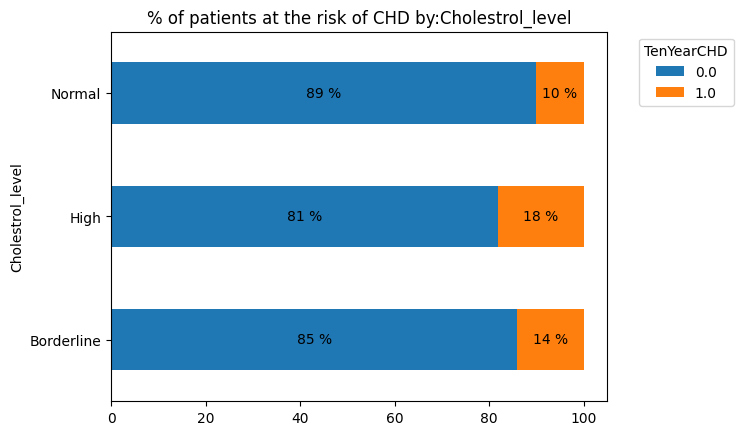

<Figure size 1000x500 with 0 Axes>

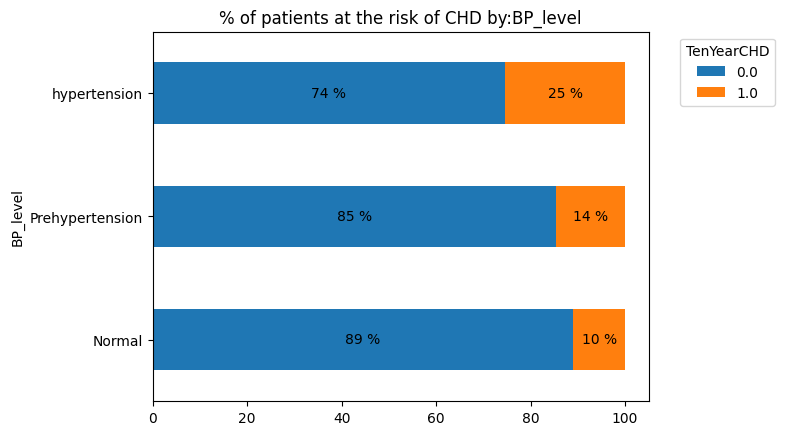

<Figure size 1000x500 with 0 Axes>

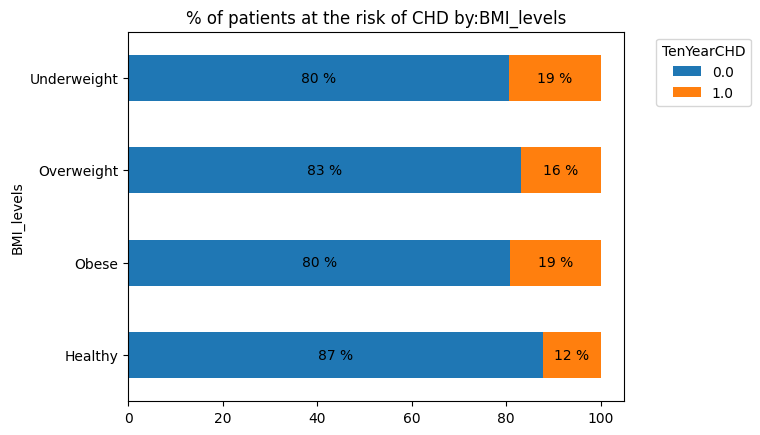

<Figure size 1000x500 with 0 Axes>

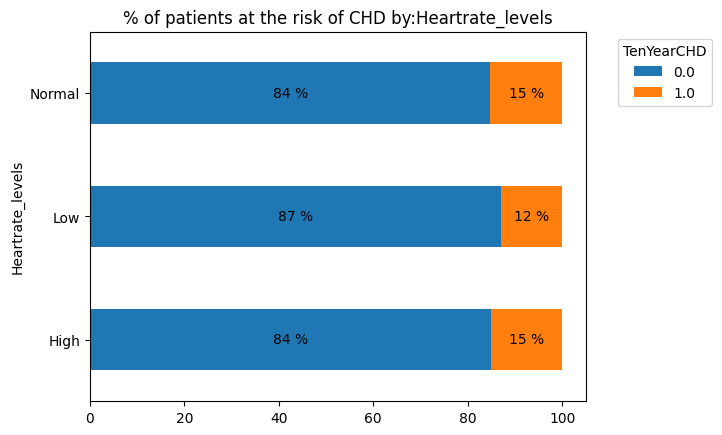

<Figure size 1000x500 with 0 Axes>

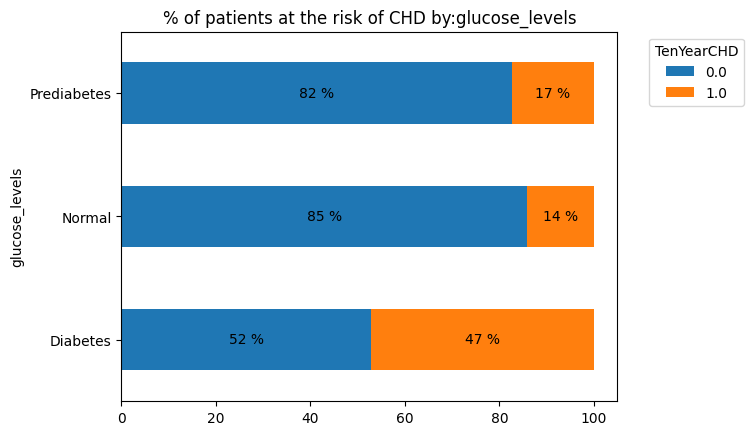

<Figure size 1000x500 with 0 Axes>

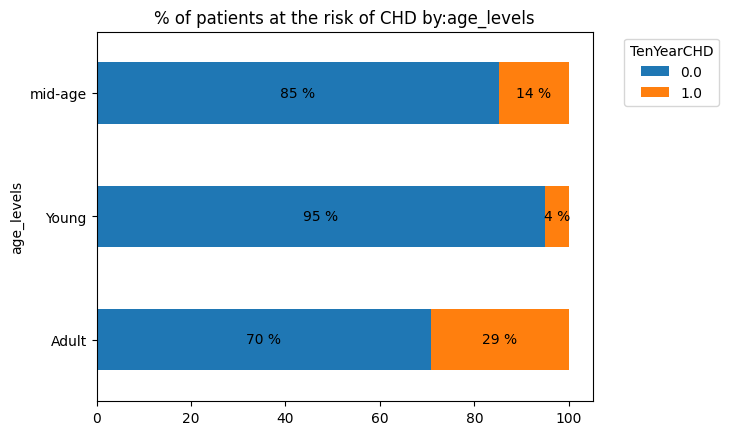

<Figure size 1000x500 with 0 Axes>

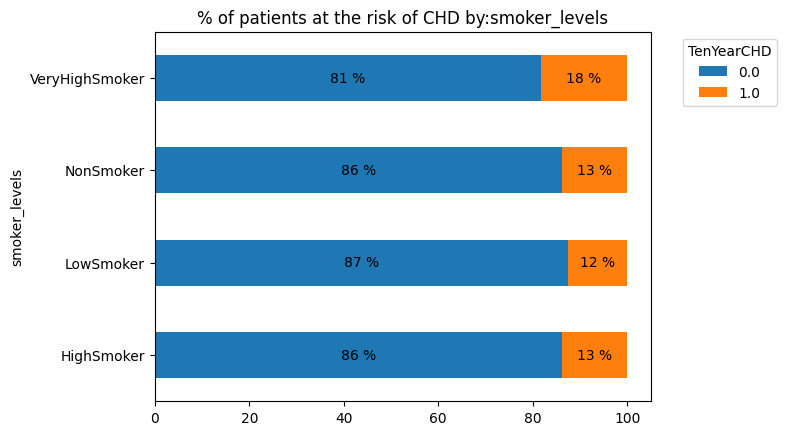

In [ ]:
for i in dataset.iloc[:,15:]:
  x_var, y_var = i, 'TenYearCHD'
  plt.figure(figsize=(10,5))
  dataset_grouped = dataset.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
  dataset_grouped.plot.barh(stacked=True)
  plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title=y_var)

  plt.title("% of patients at the risk of CHD by:" + i)
  for ix, row in dataset_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
  plt.show()

##### 1. Why did you pick the specific chart?

In a stacked bar chart, the bars are divided into segments, with each segment representing a different category within the data. The segments are stacked on top of each other to create a single bar. Stacked bar charts are a useful tool for visualizing the distribution of categorical data, especially when you want to compare multiple variables or track changes over time.



##### 2. What is/are the insight(s) found from the chart?

The Insights found are:
1. Patients having high colestrol has 18% chance of risk than borderline(14%) and normal(10%)
2. Patients having hypertension 25% chance of risk than prehypertension(14%) and normal(10%)
3. Patients being Underweight and obese has 19% chances of risk than overweight(16%) and healthy(12%)
4. Patients Having heart rate being normal and high has high chance than low.
5. Patient being diabetic has 47% of chance of risk than prediabetic(17%) and normal(14%)
6. Adult above 60 has high chance of risk.
7. Patients smoking large number of cigrettes per day has high on risk

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It is very helpful as it tells you about the people being high at risk and what is the exact cause or reason for that.

#### Chart - 7 - Correlation Heatmap

In [ ]:
num_var.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64.0,3.0,221.0,148.0,85.0,25.38,90.0,80.0
1,36.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46.0,10.0,250.0,116.0,71.0,20.35,88.0,94.0
3,50.0,20.0,233.0,158.0,88.0,28.26,68.0,94.0
4,64.0,30.0,241.0,136.5,85.0,26.42,70.0,77.0


<Axes: title={'center': 'Correlation Analysis'}>

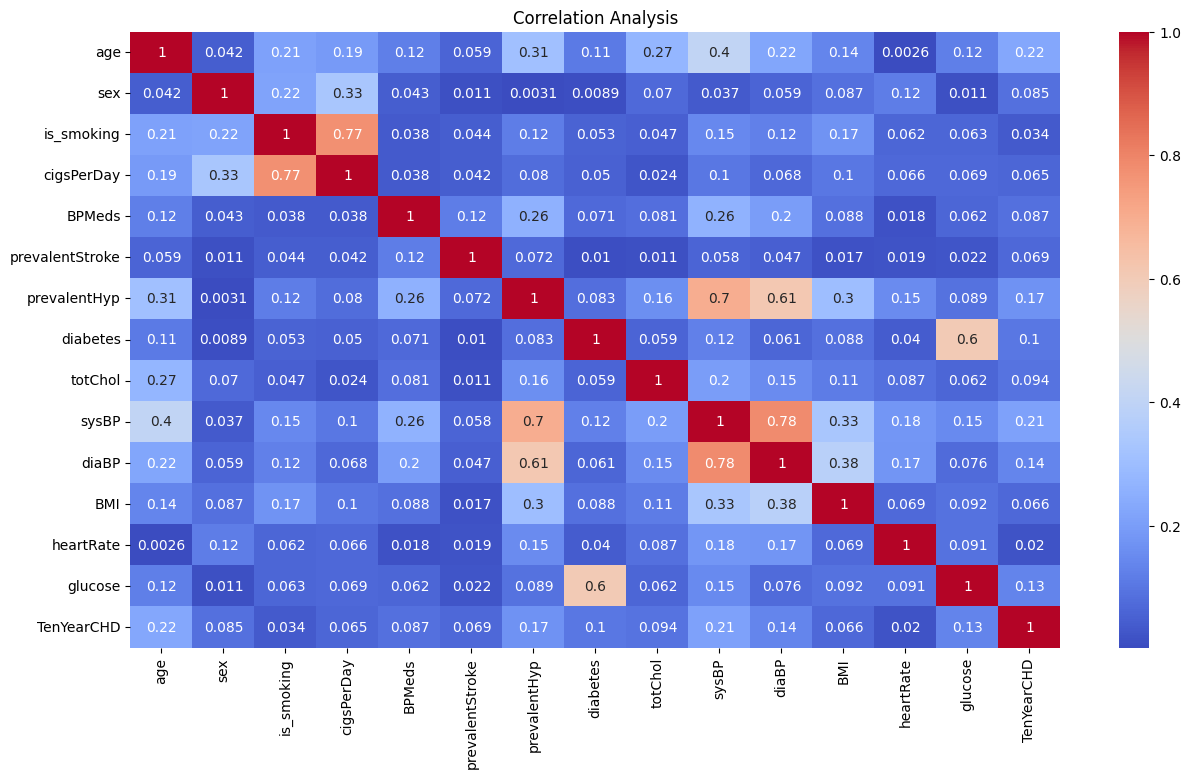

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["Predictor Variable"] = df.columns

# Print the VIF values
print(vif)

    VIF Factor Predictor Variable
0    41.532720                age
1     2.779105                sex
2     5.028445         is_smoking
3     4.333148         cigsPerDay
4     1.133949             BPMeds
5     1.029239    prevalentStroke
6     2.410505       prevalentHyp
7     1.567345           diabetes
8    30.656415            totChol
9   135.908913              sysBP
10  127.544055              diaBP
11   44.162496                BMI
12   39.637764          heartRate
13   20.333498            glucose
14    1.291648         TenYearCHD


We can combine these two features sysBP and diaBP using the following formula:

Mean_arterial_bp = (sysBP+2*diaBP)/3

In [ ]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df["mean_art_bp"] = (df["sysBP"] + 2 * df["diaBP"])/3

# Dropping the SysBP and DiaBp attributes, since they're both included in MAP.
df.drop(columns = ["sysBP", "diaBP"], inplace = True)

<Axes: title={'center': 'Correlation Analysis'}>

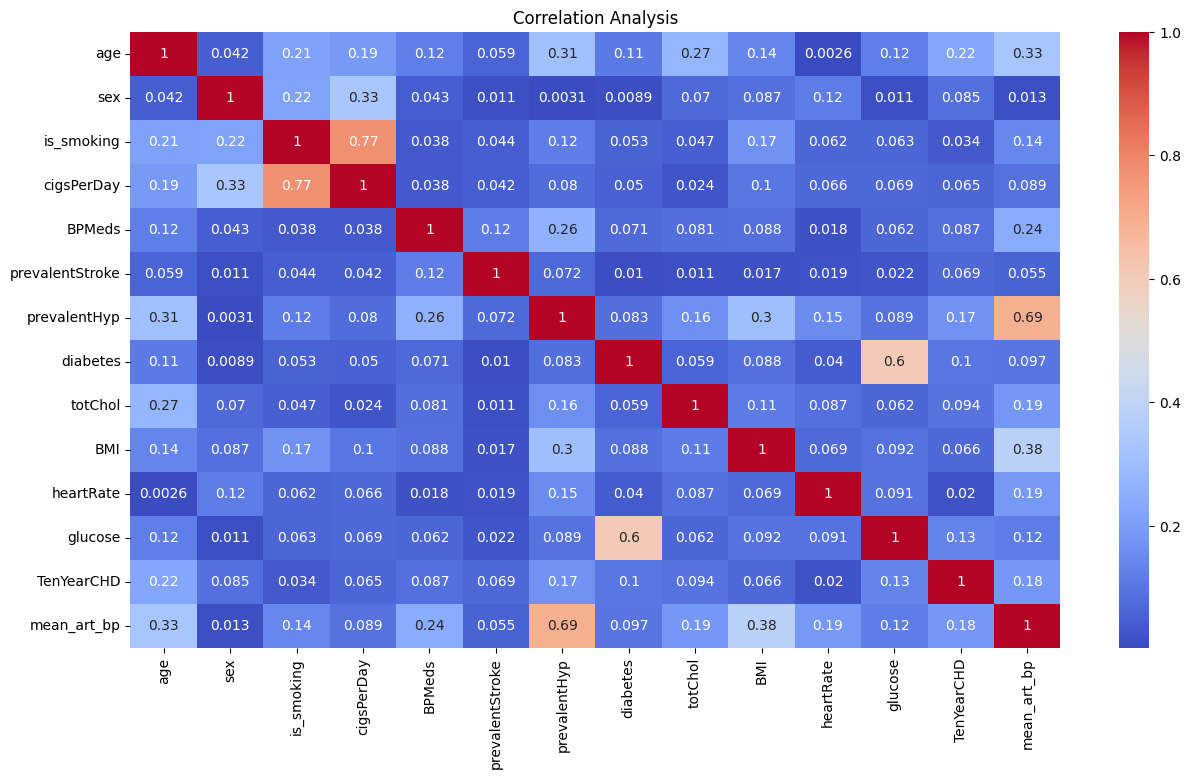

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmaps are a powerful visualization tool that can help you visualize relationships, identify patterns and trends, cluster data, and visualize large and complex datasets. They are particularly useful when you have a large number of variables or when you want to see patterns and relationships between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

The sysBP and diaBP having a high correlation so we created a variable having both and dropped the given variable

## ***5. Hypothesis / Feature Selection***

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Two variables are independent.

Alternate Hypothesis (H1): Two variables are not independent.

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Chi2 Function on categorical variable to check dependency
chi_scores = chi2(df[categorical_var],df[dependent_var])
chi_scores

(array([10.51112716,  1.98522603, 25.10243827, 15.8619983 , 64.37770831,
        35.50630598]),
 array([1.18657855e-03, 1.58840936e-01, 5.43640748e-07, 6.81331780e-05,
        1.02713702e-15, 2.54226209e-09]))

In [ ]:
# Perform Statistical Test to obtain P-Value
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking         1.588409e-01
sex                1.186579e-03
prevalentStroke    6.813318e-05
BPMeds             5.436407e-07
diabetes           2.542262e-09
prevalentHyp       1.027137e-15
dtype: float64

<Axes: title={'center': 'P-value for discrete features'}, xlabel='P-value'>

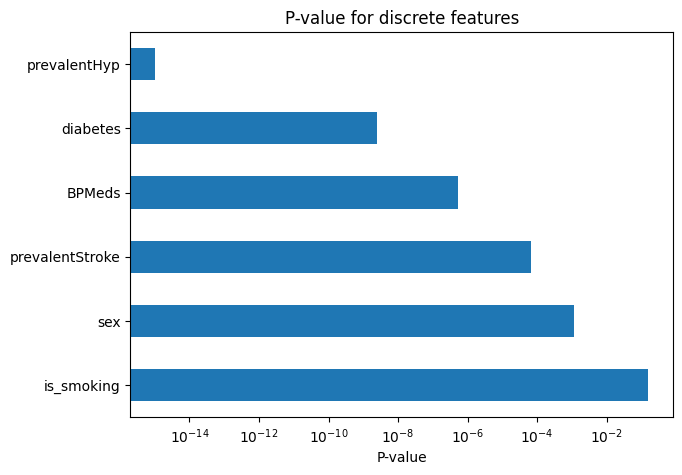

In [ ]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(7,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).
We can drop this column since we already have a column cigs_per_day, which gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.

In [ ]:
# dropping is_smoking
df.drop('is_smoking',axis=1,inplace=True)

In [ ]:
# dropping is smoking 
categorical_var.remove('is_smoking')
categorical_var

['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [ ]:
cat_var.drop('is_smoking',axis=1,inplace=True)

In [ ]:
df.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,mean_art_bp
0,64.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,25.38,90.0,80.0,1.0,106.000000
1,36.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,29.77,72.0,75.0,0.0,121.333333
2,46.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,20.35,88.0,94.0,0.0,86.000000
3,50.0,0.0,20.0,0.0,0.0,1.0,0.0,233.0,28.26,68.0,94.0,1.0,111.333333
4,64.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,26.42,70.0,77.0,0.0,102.166667


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

Handling the Outliers by Quantile Funtion

In [ ]:
data = df.copy()

In [ ]:
q01 = data['totChol'].quantile(0.01)
q99 = data['totChol'].quantile(0.99)
mask = (data['totChol'] < q01) | (data['totChol'] > q99)
data['totChol'] = data['totChol'].clip(q01, q99)
data_1 = data.drop(data[mask].index)

In [ ]:
data_1.shape

(3323, 13)

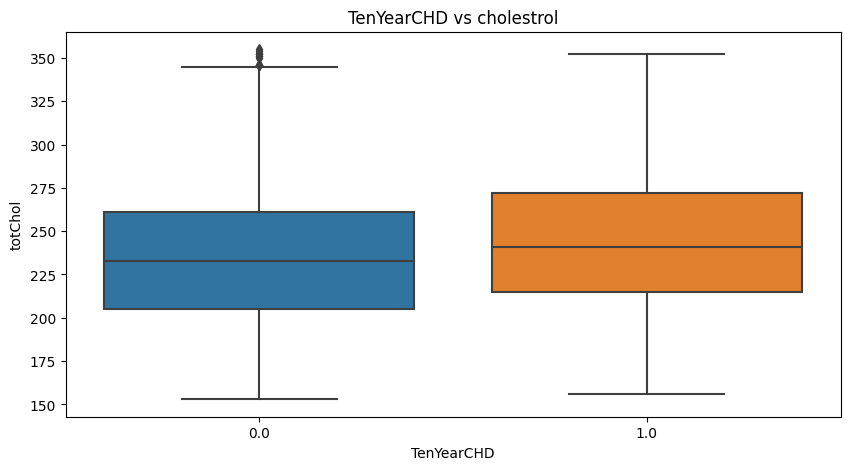

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data_1['TenYearCHD'],y=data_1['totChol'],data=data_1) 
plt.ylabel('totChol')
plt.xlabel('TenYearCHD')
plt.title('TenYearCHD vs cholestrol')
plt.show()

In [ ]:
q01 = data_1['mean_art_bp'].quantile(0.01)
q99 = data_1['mean_art_bp'].quantile(0.99)
mask = (data_1['mean_art_bp'] < q01) | (data_1['mean_art_bp'] > q99)
data_1['mean_art_bp'] = data_1['mean_art_bp'].clip(q01, q99)
data_2 = data_1.drop(data_1[mask].index)

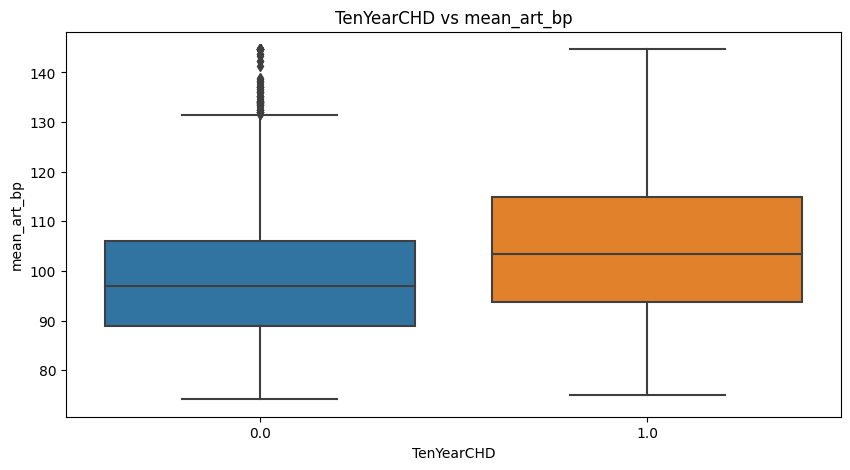

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data_2['TenYearCHD'],y=data_2['mean_art_bp'],data=data_2) 
plt.ylabel('mean_art_bp')
plt.xlabel('TenYearCHD')
plt.title('TenYearCHD vs mean_art_bp')
plt.show()

In [ ]:
q01 = data_2['BMI'].quantile(0.01)
q99 = data_2['BMI'].quantile(0.99)
mask = (data_2['BMI'] < q01) | (data_2['BMI'] > q99)
data_2['BMI'] = data_2['BMI'].clip(q01, q99)
data_4 = data_2.drop(data_2[mask].index)

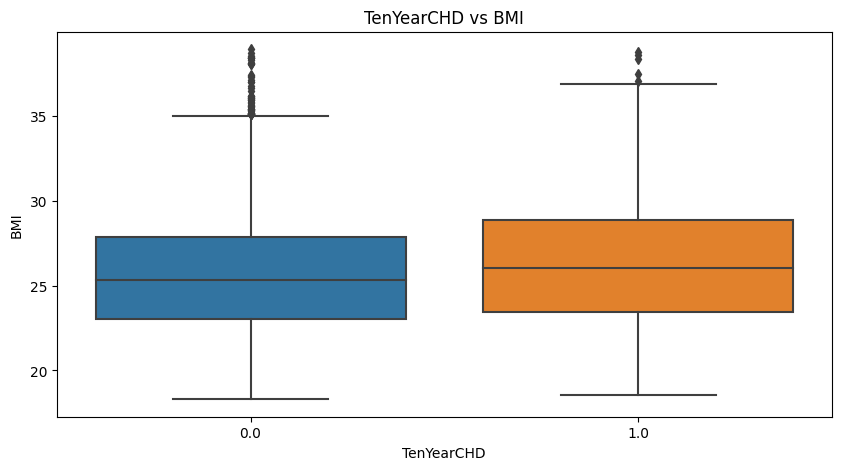

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data_4['TenYearCHD'],y=data_4['BMI'],data=data_4) 
plt.ylabel('BMI')
plt.xlabel('TenYearCHD')
plt.title('TenYearCHD vs BMI')
plt.show()

In [ ]:
q01 = data_4['heartRate'].quantile(0.01)
q99 = data_4['heartRate'].quantile(0.99)
mask = (data_4['heartRate'] < q01) | (data_4['heartRate'] > q99)
data_4['heartRate'] = data_4['heartRate'].clip(q01, q99)
data_5 = data_4.drop(data_4[mask].index)

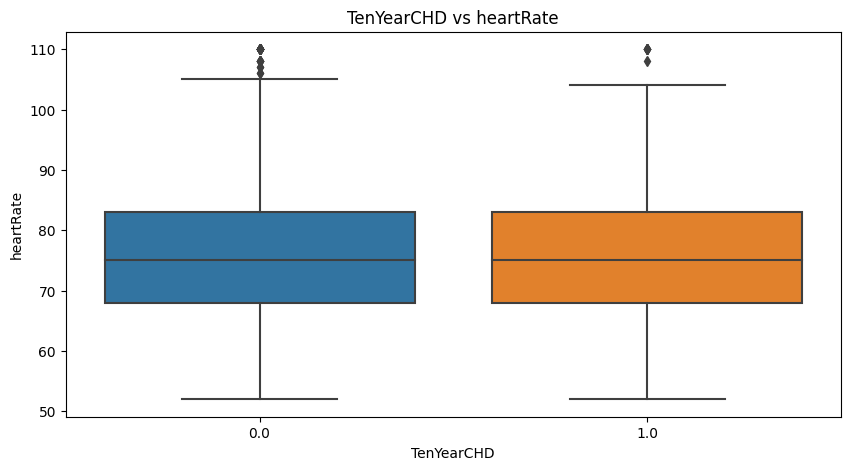

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data_5['TenYearCHD'],y=data_5['heartRate'],data=data_5) 
plt.ylabel('heartRate')
plt.xlabel('TenYearCHD')
plt.title('TenYearCHD vs heartRate')
plt.show()

In [ ]:
q01 = data_5['glucose'].quantile(0.01)
q99 = data_5['glucose'].quantile(0.99)
mask = (data_5['glucose'] < q01) | (data_5['glucose'] > q99)
data_5['glucose'] = data_5['glucose'].clip(q01, q99)
data_6 = data_5.drop(data_5[mask].index)

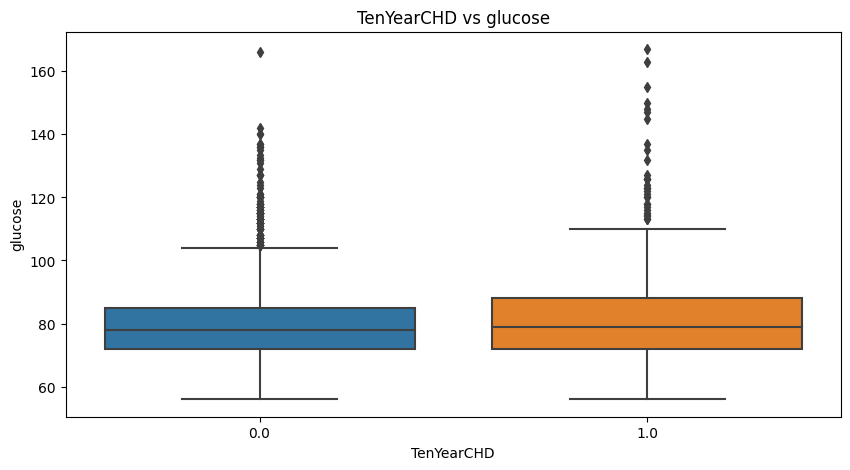

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data_6['TenYearCHD'],y=data_6['glucose'],data=data_6) 
plt.ylabel('glucose')
plt.xlabel('TenYearCHD')
plt.title('TenYearCHD vs glucose')
plt.show()

In [ ]:
clean_data = data_6.copy()

### 2. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We are using the log transformation since it helps in handling the outliers which are left and reduce the magnitude of skew in these variables. 

In [ ]:
continuous_var =['age','cigsPerDay','totChol','BMI','heartRate','glucose','mean_art_bp']

In [ ]:
# Transform Your data
# Implementing log transformation on continuous variables
for i in continuous_var:
  clean_data[i] = np.log10(clean_data[i]+1)

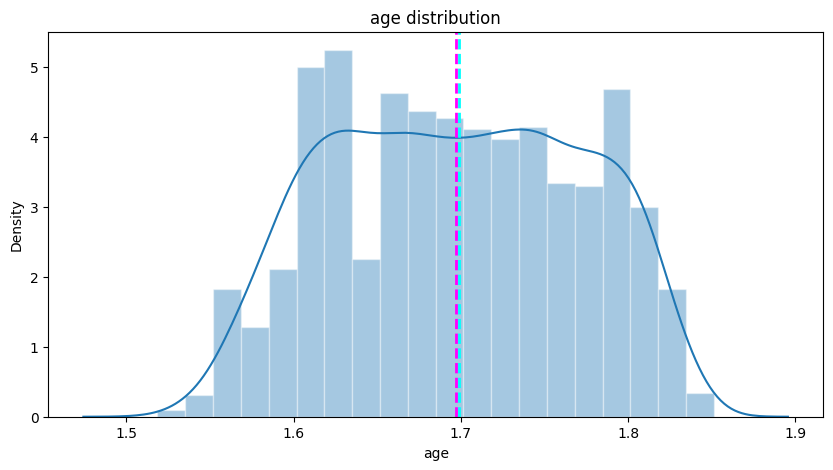

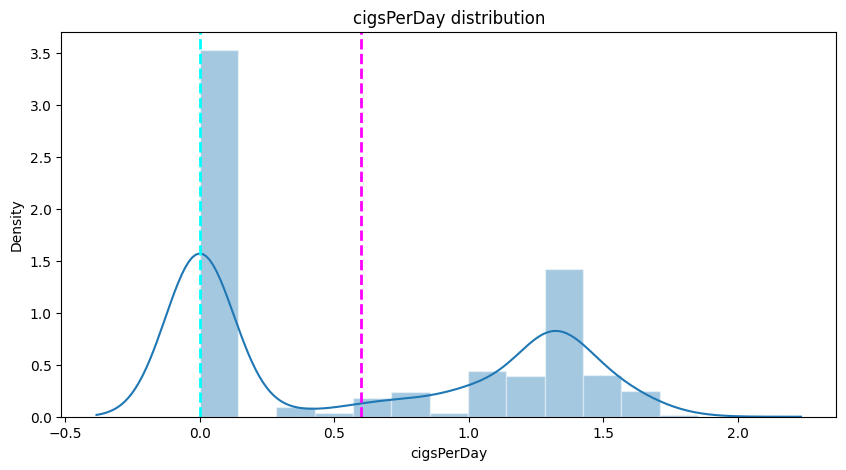

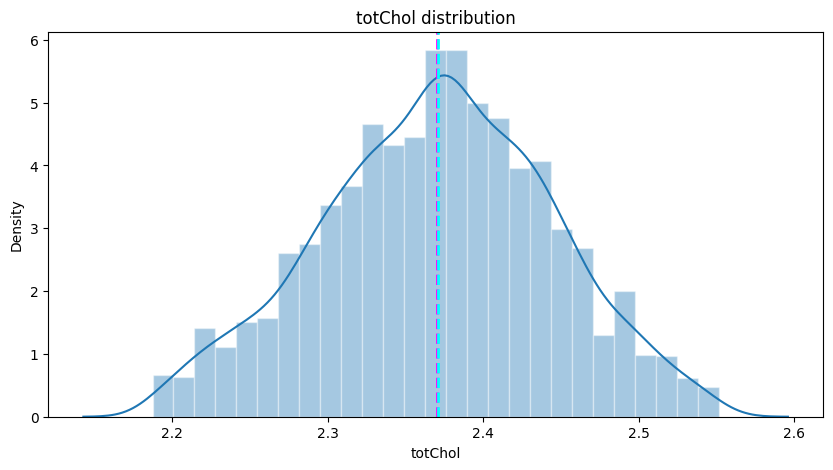

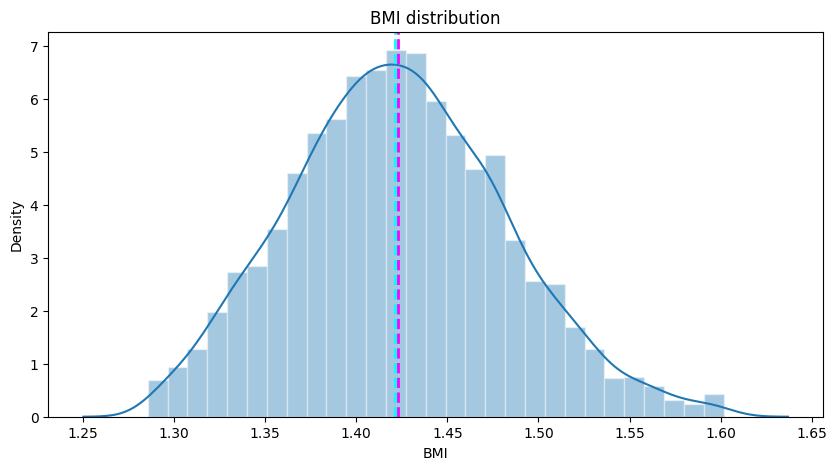

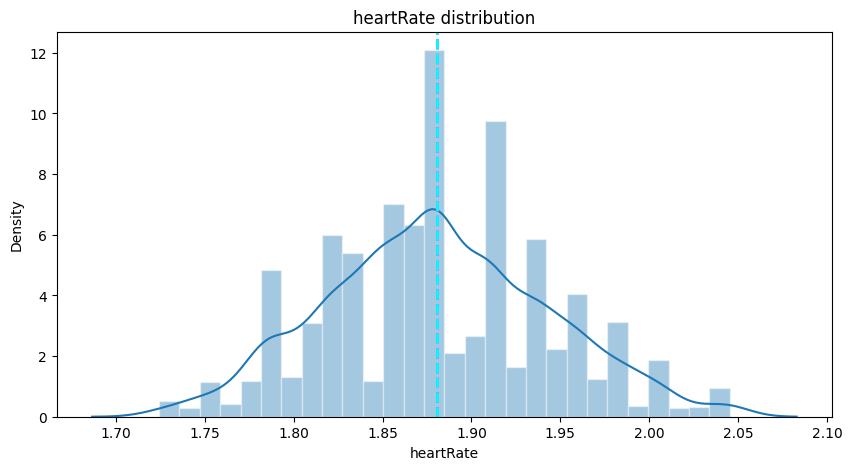

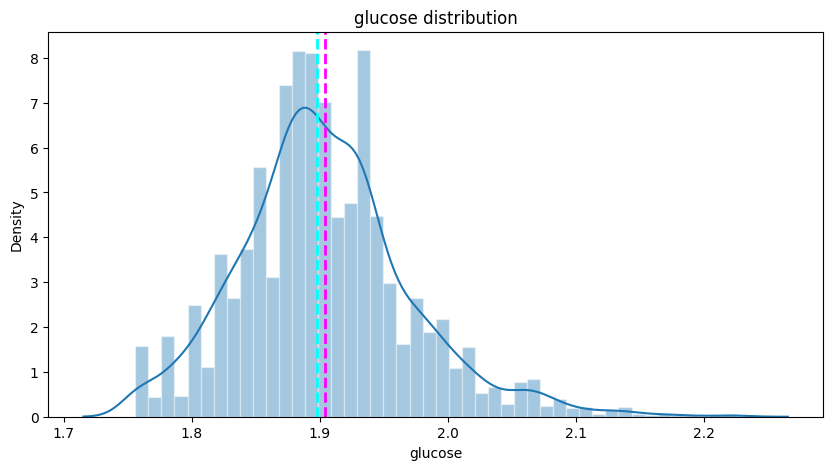

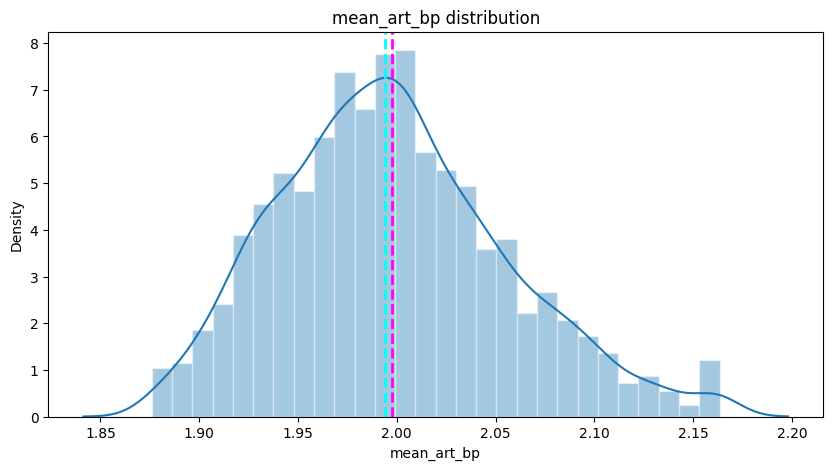

In [ ]:
# Analysing the transformed distribution and plots
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.histplot(
    clean_data[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    )
  plt.axvline(clean_data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(clean_data[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

### 3. Data Splitting

In [ ]:
X = clean_data.drop('TenYearCHD', axis=1)
y = clean_data['TenYearCHD']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0, stratify=y, shuffle=True)

In [ ]:
y_train.value_counts()

0.0    2021
1.0     343
Name: TenYearCHD, dtype: int64

In [ ]:
y_test.value_counts()

0.0    673
1.0    115
Name: TenYearCHD, dtype: int64

### 4. Data Scaling

the predictions from the distance based models will get affected if the attributes are in different ranges, we need to scale them.
We can use StandardScaler to scale down the variables.
The results obtained from scaling can be stored and used while building those models.Tree algorithms do not necessarily require scaling.

In [ ]:
# Scaling your data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 5. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

<Axes: title={'center': 'Target variable before SMOTE'}>

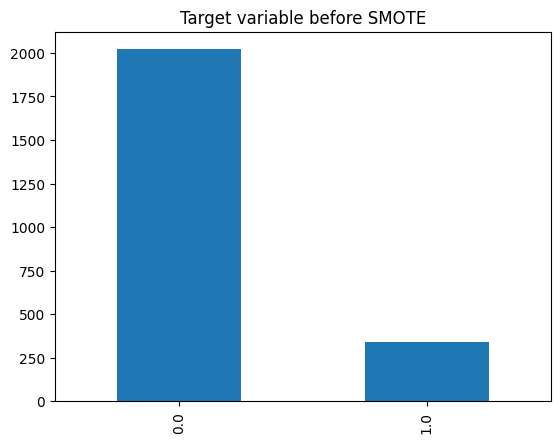

In [ ]:
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [ ]:
# Handling Imbalanced Dataset (If needed)
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train_scaled,y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2364
Samples in the resampled dataset 4042


<Axes: title={'center': 'Target variable after SMOTE'}>

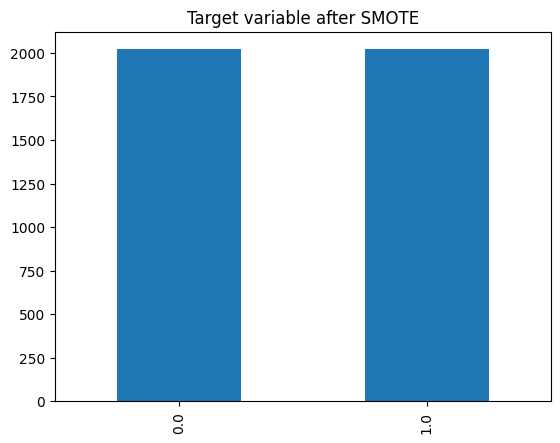

In [ ]:
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.

In [ ]:
# Converting the numpy array to dataframe
X_smote = pd.DataFrame(X_smote,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
X_smote.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,mean_art_bp
0,-1.301361,-1.129276,0.930649,-0.174684,-0.082549,-0.66575,-0.111444,-0.680327,-1.469271,-0.481723,-0.391238,-0.001316
1,-1.155474,0.885523,1.114143,-0.174684,-0.082549,-0.66575,-0.111444,-1.298718,-0.923251,-1.533616,-1.053074,-1.081675
2,-1.155474,-1.129276,1.565600,-0.174684,-0.082549,-0.66575,-0.111444,-1.886458,0.097160,0.431332,0.300773,-0.153772
3,-1.155474,0.885523,-0.940224,-0.174684,-0.082549,-0.66575,-0.111444,-1.206265,0.182326,1.462712,-0.092415,-0.603374
4,-1.013102,0.885523,0.677815,-0.174684,-0.082549,-0.66575,-0.111444,-1.115254,-0.951845,0.846378,2.999467,0.135763


In [ ]:
X_test_scaled.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,mean_art_bp
0,1.815058,0.884763,-0.928529,-0.152894,-0.061820,1.454175,-0.129515,0.661148,-0.244457,-2.056336,-1.251561,0.473141
1,-0.702075,0.884763,-0.928529,-0.152894,-0.061820,-0.687675,-0.129515,-0.622746,0.639363,0.488702,0.816646,-0.845992
2,0.374022,-1.130246,-0.171231,-0.152894,-0.061820,-0.687675,-0.129515,0.335575,0.543483,1.291387,1.359190,-0.327323
3,0.994146,-1.130246,-0.928529,6.540472,16.176114,1.454175,-0.129515,0.214807,1.620326,-0.923417,-2.195527,1.409740
4,1.815058,0.884763,-0.928529,-0.152894,-0.061820,-0.687675,-0.129515,0.406867,0.071290,-0.419887,0.600796,-0.874300


##***Models***
Following models have been used for predictions:-

1. Logistic Regression Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. K-Nearest Neighbors Classifier
5. Gaussian Naive Bayes Classifier
6. XG Boost Classifier
7. Support Vector Machine Classifier

## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [ ]:
# ML Model - 1 Implementation
logreg = LogisticRegression(fit_intercept = True , max_iter = 10000)
# Fit the Algorithm
logreg.fit(X_smote, y_smote)

LogisticRegression(max_iter=10000)

In [ ]:
# train Prediction
y_pred_train_lr = logreg.predict(X_smote)

In [ ]:
# train Recall
lr_train_recall = recall_score(y_pred_train_lr,y_smote)
lr_train_recall

0.664292497625831

In [ ]:
# test prediction
y_pred_test_lr = logreg.predict(X_test_scaled)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_pred_train_lr,y_smote)
test_accuracy = accuracy_score(y_pred_test_lr,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6712023750618505
The accuracy on test data is  0.6408629441624365


In [ ]:
# test Recall
lr_test_recall = recall_score(y_pred_test_lr,y_test)
lr_test_recall

0.23417721518987342

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Classification Report
print(classification_report(y_pred_test_lr,y_test))

              precision    recall  f1-score   support

         0.0       0.64      0.91      0.75       472
         1.0       0.64      0.23      0.34       316

    accuracy                           0.64       788
   macro avg       0.64      0.57      0.55       788
weighted avg       0.64      0.64      0.59       788



[[431 242]
 [ 41  74]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

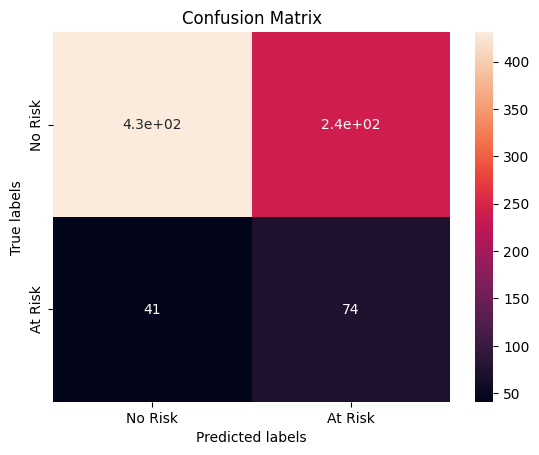

In [ ]:
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, y_pred_test_lr)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model - 2 - Decision tree

In [ ]:
# ML Model - 1 Implementation
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=0)
# Fit the Algorithm
dt_classifier.fit(X_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=0)

In [ ]:
# Predict Train
y_pred_train_dt = dt_classifier.predict(X_smote)

In [ ]:
# Accuracy of Train
accuracy_score(y_smote,y_pred_train_dt)

0.7333003463631865

In [ ]:
# Predict test
y_pred_test_dt = dt_classifier.predict(X_test_scaled)

In [ ]:
#Accuracy Of Test
accuracy_score(y_test,y_pred_test_dt)

0.3769035532994924

In [ ]:
# Recall Of Train and Test
dt_train_recall = recall_score(y_smote,y_pred_train_dt)
print('Train Recall: ',dt_train_recall)

dt_test_recall = recall_score(y_test,y_pred_test_dt)
print('Test Recall: ',dt_test_recall)

Train Recall:  0.8377041068777833
Test Recall:  0.8956521739130435


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.94      0.29      0.44       673
         1.0       0.18      0.90      0.30       115

    accuracy                           0.38       788
   macro avg       0.56      0.59      0.37       788
weighted avg       0.83      0.38      0.42       788



[[194 479]
 [ 12 103]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

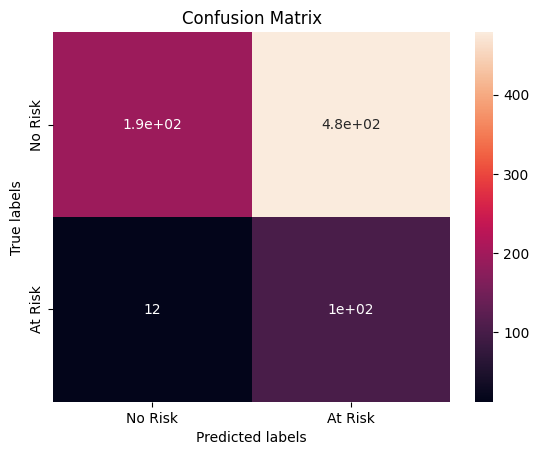

In [ ]:
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, y_pred_test_dt)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

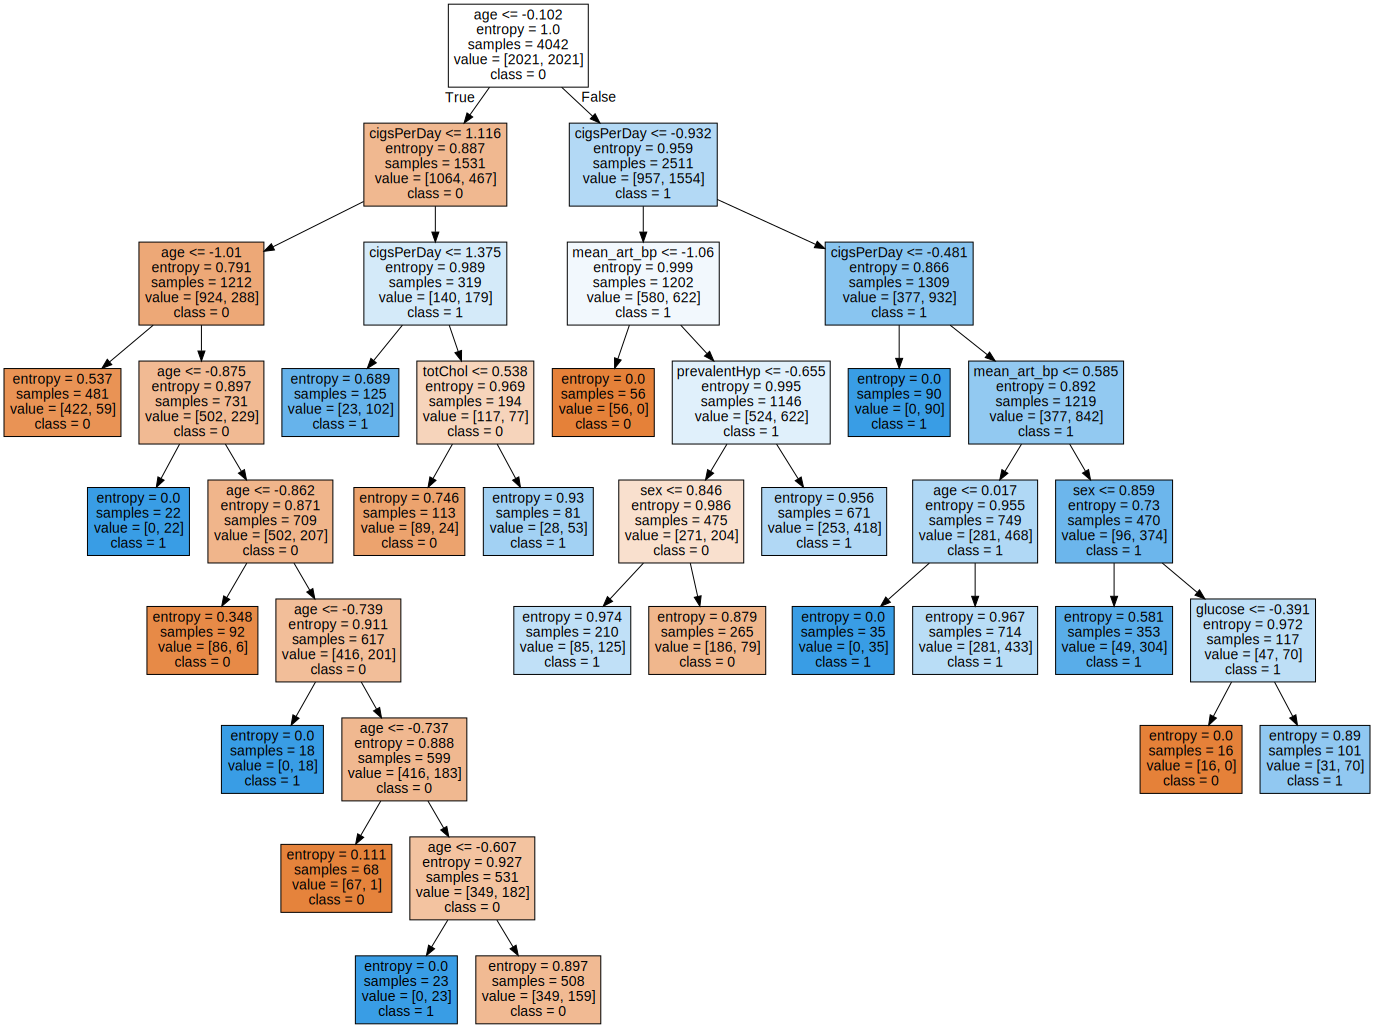

In [ ]:
graph = Source(tree.export_graphviz(dt_classifier, out_file=None
   , feature_names=X_smote.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

### ML Model - 3 - Random Forest

In [ ]:
# ML Model - 3 Implementation
rf_classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rf_gridsearch = GridSearchCV(rf_classifier, param_grid = grid_values, scoring = 'recall', cv=5)

# Fit the object to train dataset
rf_gridsearch.fit(X_smote, y_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='recall')

In [ ]:
rf_best_params = rf_gridsearch.best_params_

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],max_depth=rf_best_params['max_depth'])

In [ ]:
rf_classifier.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=7)

In [ ]:
train_preds_rf =  rf_classifier.predict(X_smote)
test_preds_rf  = rf_classifier.predict(X_test_scaled)

In [ ]:
# Accuracy of Train
accuracy_score(y_smote,train_preds_rf)

0.8265710044532409

In [ ]:
# Accuracy of Test
accuracy_score(y_test,test_preds_rf)

0.5342639593908629

In [ ]:
print(classification_report(y_test,test_preds_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.49      0.64       673
         1.0       0.21      0.79      0.33       115

    accuracy                           0.53       788
   macro avg       0.57      0.64      0.49       788
weighted avg       0.83      0.53      0.60       788



In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(y_smote,train_preds_rf)

0.8265710044532409

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(y_test,test_preds_rf)

0.640823050584663

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[330 343]
 [ 24  91]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

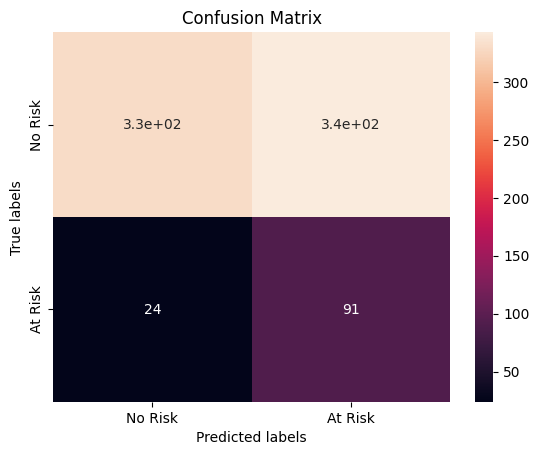

In [ ]:
# Visualizing evaluation Metric Score chart
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Plotting the Important Features
features = X_smote.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

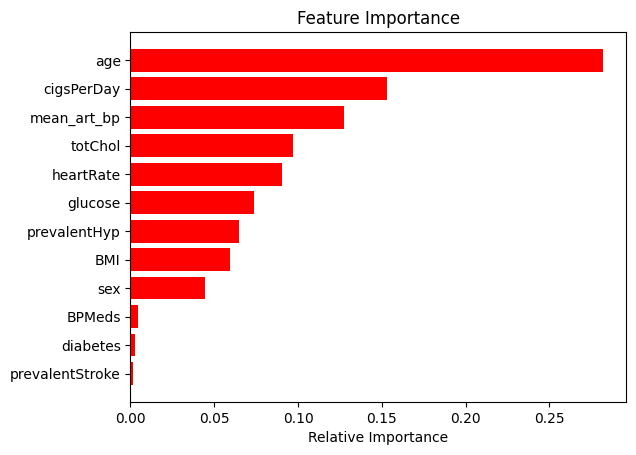

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()



*   Features other than age are also given importance in this case insted of just one feature in case of decision tree.

*   But age still remains the most important feature in predicting the final outcome for random forests.



### ML Model - 4 - XG Boost






In [ ]:
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}

In [ ]:
# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=5,scoring='recall')
xgb_gridsearch.fit(X_smote,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

In [ ]:
xgb_best_params

{'max_depth': 7, 'n_estimators': 50}

In [ ]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
xgb_model.fit(X_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
xgb_train_pred = xgb_model.predict(X_smote)
xgb_test_pred = xgb_model.predict(X_test_scaled)

In [ ]:
# train recall
xgb_train_recall = recall_score(y_smote,xgb_train_pred)
xgb_train_recall

0.9841662543295399

In [ ]:
xgb_test_recall = recall_score(y_test,xgb_test_pred)
xgb_test_recall

0.8782608695652174

In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(y_smote,xgb_train_pred)

0.9905987135081642

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(y_test,xgb_test_pred)

0.5357129013502164

In [ ]:
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.19      0.32       673
         1.0       0.16      0.88      0.27       115

    accuracy                           0.29       788
   macro avg       0.53      0.54      0.29       788
weighted avg       0.79      0.29      0.31       788



[[130 543]
 [ 14 101]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

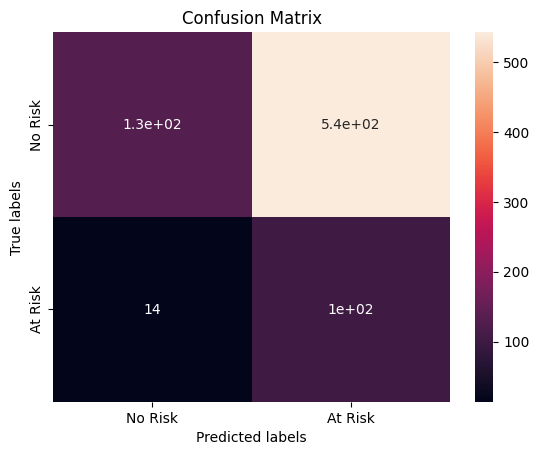

In [ ]:
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, xgb_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Plotting the Important Features
features = X_smote.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

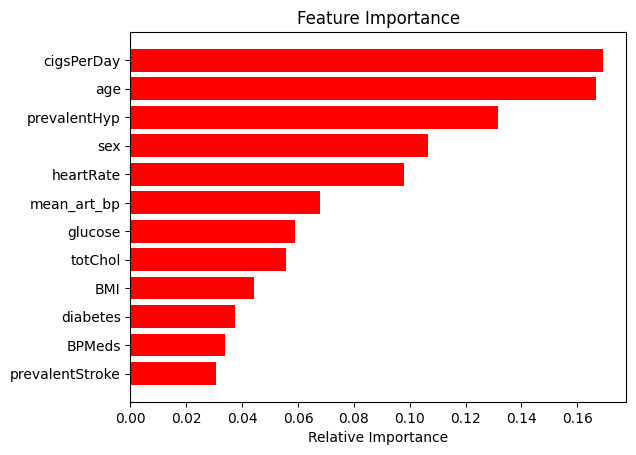

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()



*   Age in the most important feature in deciding the outcome of the variables for XG boost.

*   Multiple features are given importance here rather than just one feature in case of decision tree.



### ML Model 5 - K Nearest Neighbour

In [ ]:

knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote, y_smote)
  knn_train_pred = knn_model.predict(X_smote)
  knn_train_recall = recall_score(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall_score(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)
     

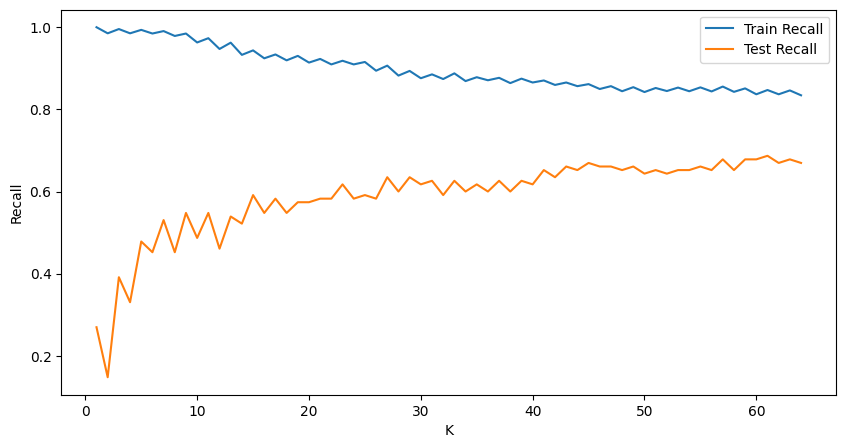

In [ ]:
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
# Best k is where the recall is highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

61

In [ ]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
# training the model
knn_model.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=61)

In [ ]:
train_knn_prediction = knn_model.predict(X_smote)
test_knn_prediction = knn_model.predict(X_test_scaled)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_knn = accuracy_score(train_knn_prediction, y_smote)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  0.6956952003958436
The accuracy on test data is  0.5469543147208121


In [ ]:
# Train Recall
recall_score(y_smote,train_knn_prediction)

0.847105393369619

In [ ]:
# Test recall
recall_score(y_test,test_knn_prediction)

0.6869565217391305

In [ ]:
# Train roc_auc
roc_auc_score(y_smote,train_knn_prediction)

0.6956952003958436

In [ ]:
# Test AUC_ROC
roc_auc_score(y_test,test_knn_prediction)

0.6049938626526261

In [ ]:
print(classification_report(y_test,test_knn_prediction))

              precision    recall  f1-score   support

         0.0       0.91      0.52      0.66       673
         1.0       0.20      0.69      0.31       115

    accuracy                           0.55       788
   macro avg       0.55      0.60      0.49       788
weighted avg       0.80      0.55      0.61       788



[[352 321]
 [ 36  79]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

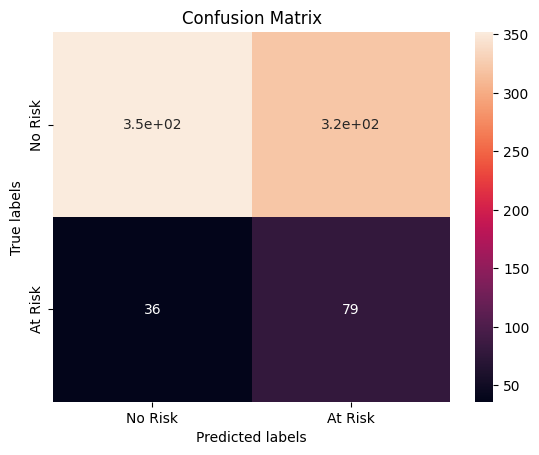

In [ ]:
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_knn_prediction)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model - 6 - Naive Bayes

In [ ]:
gnb = GaussianNB()

nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [ ]:

nb_gridsearch = GridSearchCV(gnb,
                             nb_params,
                             cv=5,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [ ]:
# building knn model with best parameters
gnb = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [ ]:
# training the model
gnb.fit(X_smote, y_smote)

GaussianNB(var_smoothing=0.012328467394420659)

In [ ]:
train_class_preds_gnb = gnb.predict(X_smote)
test_class_preds_gnb = gnb.predict(X_test_scaled)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_gnb = accuracy_score(train_class_preds_gnb, y_smote)
test_accuracy_gnb = accuracy_score(test_class_preds_gnb, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_gnb)
print("The accuracy on test data is ", test_accuracy_gnb)

The accuracy on train data is  0.5979713013359723
The accuracy on test data is  0.8083756345177665


In [ ]:
print(classification_report(test_class_preds_gnb, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       686
         1.0       0.29      0.32      0.30       102

    accuracy                           0.81       788
   macro avg       0.59      0.60      0.60       788
weighted avg       0.82      0.81      0.81       788



[[604  69]
 [ 82  33]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

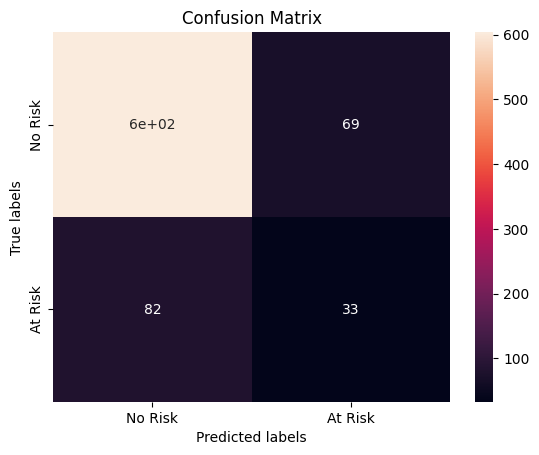

In [ ]:
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_class_preds_gnb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model - 7 - Support Vector Machine

In [ ]:
# SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [ ]:
# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=5,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [ ]:
svm_best_params

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [ ]:
# training the model 
svm_model.fit(X_smote, y_smote)

SVC(C=10, gamma=0.001)

In [ ]:
train_class_preds_svm = svm_model.predict(X_smote)
test_class_preds_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_svm = accuracy_score(train_class_preds_svm, y_smote)
test_accuracy_svm = accuracy_score(test_class_preds_svm, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", test_accuracy_svm)

The accuracy on train data is  0.6647699158832261
The accuracy on test data is  0.6307106598984772


In [ ]:
print(classification_report(test_class_preds_svm, y_test))

              precision    recall  f1-score   support

         0.0       0.62      0.92      0.74       450
         1.0       0.70      0.24      0.36       338

    accuracy                           0.63       788
   macro avg       0.66      0.58      0.55       788
weighted avg       0.66      0.63      0.58       788



[[416 257]
 [ 34  81]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

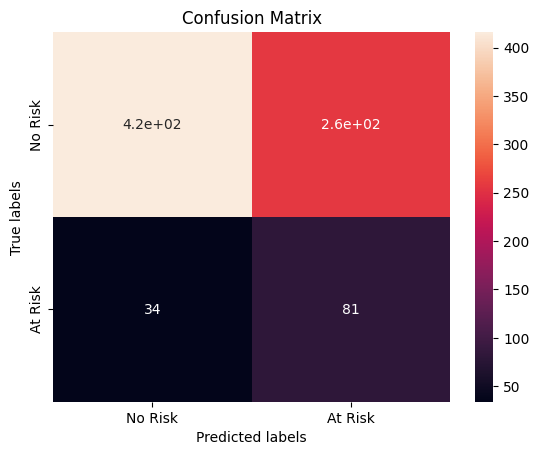

In [ ]:
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_class_preds_svm)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. The data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
2. Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
3. In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
4. Considering these points in mind, it is decided that we use Recall as the model evaluation metric.
 
 Recall = True Positive/True Positive + False Negative

## ***Comparing Models***

In [ ]:
from prettytable import PrettyTable

In [ ]:
# Plotting the table to compare the accuracy scores of all the models.

print('**** Comparison of  Models ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic regression', 0.64,	0.64,	0.23,	0.34])
table.add_row(['Decision Tree Classifier', 0.38,	0.18,	0.90,	0.30])
table.add_row(['Random Forest Classifier', 0.53,	0.21,	0.79,	0.33])
table.add_row(['K-Nearest Neighbours',0.55,	0.20,	0.69,	0.31])
table.add_row(['Gaussian Naive Bayes', 0.81,	0.29,	0.32,	0.30])
table.add_row(['XGBoost Classifier', 0.29,	0.16,	0.88,	0.27])
table.add_row(['Support Vector Machine', 0.63 ,	0.70,	0.24,	0.36])

print(table)

**** Comparison of  Models ****
+--------------------------+---------------+-----------+--------+----------+
|          Model           | Test Accuracy | Precision | Recall | F1_score |
+--------------------------+---------------+-----------+--------+----------+
|   Logistic regression    |      0.64     |    0.64   |  0.23  |   0.34   |
| Decision Tree Classifier |      0.38     |    0.18   |  0.9   |   0.3    |
| Random Forest Classifier |      0.53     |    0.21   |  0.79  |   0.33   |
|   K-Nearest Neighbours   |      0.55     |    0.2    |  0.69  |   0.31   |
|   Gaussian Naive Bayes   |      0.81     |    0.29   |  0.32  |   0.3    |
|    XGBoost Classifier    |      0.29     |    0.16   |  0.88  |   0.27   |
|  Support Vector Machine  |      0.63     |    0.7    |  0.24  |   0.36   |
+--------------------------+---------------+-----------+--------+----------+


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We can Choose Decision Tree classifier from the above model because it has the highest recall value among other. A recall score of 0.90 indicates that out of 100 individuals with the illness, our model will be able to classify 90 as high risk patients, while the remaining 10 will be misclassified. Comparing the other models, this has the best recall rate and able to perform well.

# **Conclusion**


*   We trained 7 Machine Learning models using the training dataset, and hyperparameter tuning was used in some models to improve the model performance.
*   To build the models, missing values were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.

*   Recall was chosen as the model evaluation metric because it was very important that we reduce the false negatives.


*   It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.
*   Predicting the risk of coronary heart disease is critical for reducing fatalities caused by this illness. We can avert deaths by taking the required medications and precautions if we can foresee the danger of this sickness ahead of time.


*   As age increases the risk of getting diagnosed with heart disease also increases. Cigarette consumption is also a major factor that causes CHDs.

*   Patients having Diabetes and cholesterol problems show a higher risk of CHDs. Patients with a history of “strokes” have a higher chance of developing CHDs.
*   Finally we can say that, Decision tree Classifier has performed best among all the models with  90% Recall. It is by far the highest score we have achieved.So,It's safe to say that Decision tree Classifier provides an optimal solution to our problem.







### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***